In [ ]:
# Project:  TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we are going to analyze The Movie Database (TMDb) Dataset.This data set contains information about 10,000 movies collected from The Movie Database , including user ratings and revenue.
We will try to answer the following questions:


#### Which genres are most popular over decades?
#### What properties are associated with highly profitable movies?
#### Which Production company receives more profits over period?
#### Does Runtime  effects the revenue?

## Data Wrangling

#### Importing the packages required for this project

In [101]:
#Import packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas.util.testing as tm
sns.set_style('darkgrid')

In [102]:
# load the movies Data
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [103]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [104]:
movies_df.shape

(10866, 21)

In [105]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Based on the Info of the data, we have some columns not required in our analysis. so removing the columns like :
    homepage, tagline, keywords, overview, imbd_id, cast

## Data Cleaning

In this Section , We will be droping the columns like cast, homepage, tagline, keywords, overview. We will convert the data types for release_date and release_year columns. We will count the duplicates and remove the duplicates. replacing the null values with mean for numeric and mode for categorical columns.

In [106]:
# Drop the columns mentioned above
movies_df.drop(["imdb_id","cast","homepage","tagline","keywords","overview"], axis=1, inplace = True)
movies_df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Drop the Duplicates in data

In [107]:
# Checking Duplicates in the data
sum(movies_df.duplicated())

1

In [108]:
#Removing the duplicated values
movies_df.drop_duplicates(inplace= True)
sum(movies_df.duplicated())

0

#### Removing the Null values

In [109]:
# Checking Null Values in the data
movies_df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [110]:
# Remove null values from the data
movies_df=movies_df.dropna(how='any')
movies_df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [111]:
movies_df.shape

(9806, 15)

#### Coverting Data Types

In [112]:
#Converting release_date(object datatype) to date
movies_df['release_date']=pd.to_datetime(movies_df['release_date'])

#Converting the budget_adj , Revenue_adj into int data type
movies_df['budget_adj']=movies_df['budget_adj'].astype(int)

movies_df['revenue_adj']=movies_df['revenue_adj'].astype(int)


In [113]:
#Chaecking the datatypes changed
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9806 non-null   int64         
 1   popularity            9806 non-null   float64       
 2   budget                9806 non-null   int64         
 3   revenue               9806 non-null   int64         
 4   original_title        9806 non-null   object        
 5   director              9806 non-null   object        
 6   runtime               9806 non-null   int64         
 7   genres                9806 non-null   object        
 8   production_companies  9806 non-null   object        
 9   release_date          9806 non-null   datetime64[ns]
 10  vote_count            9806 non-null   int64         
 11  vote_average          9806 non-null   float64       
 12  release_year          9806 non-null   int64         
 13  budget_adj       

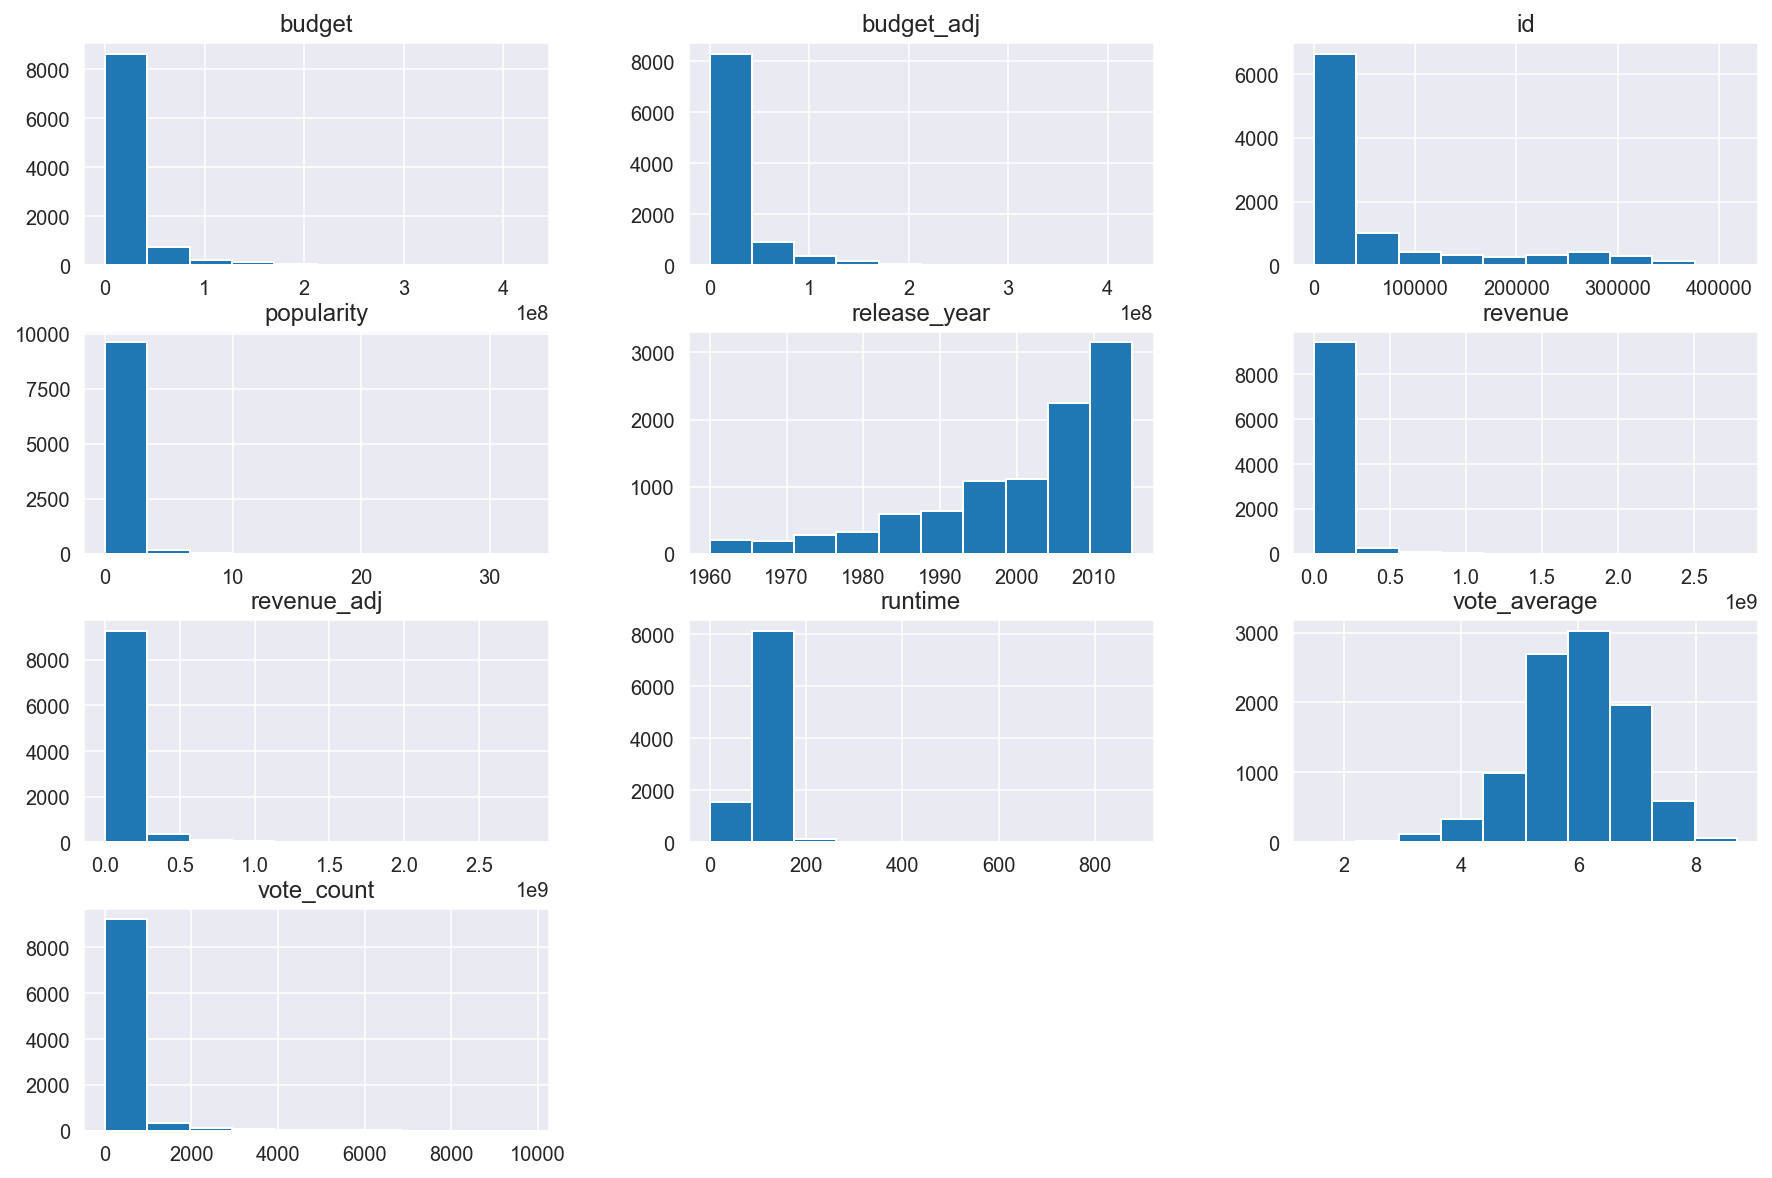

In [114]:
movies_df.hist(figsize=(15,10));

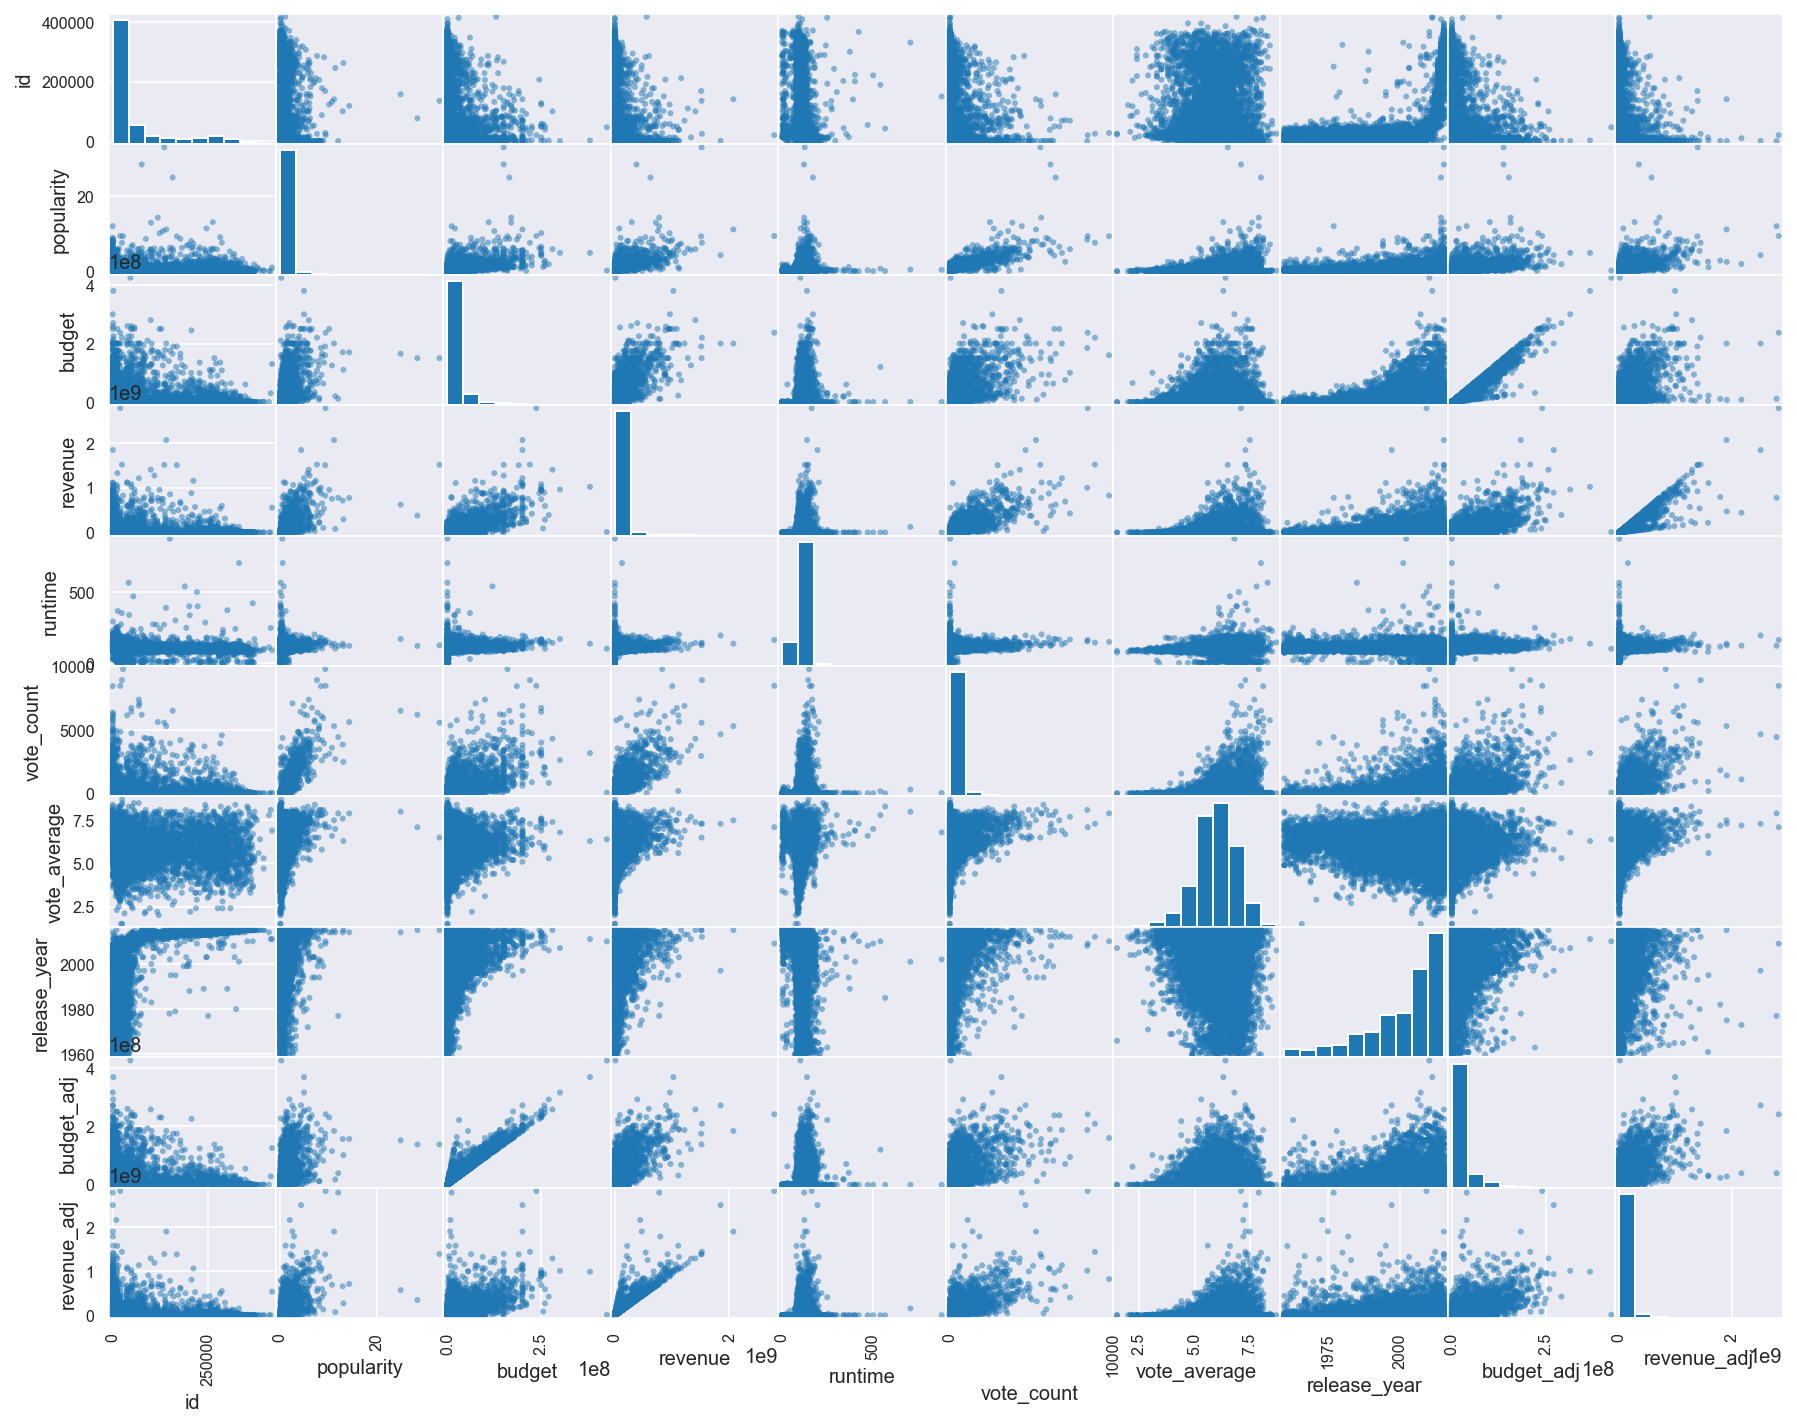

In [115]:
pd.plotting.scatter_matrix(movies_df, figsize=(15,12));

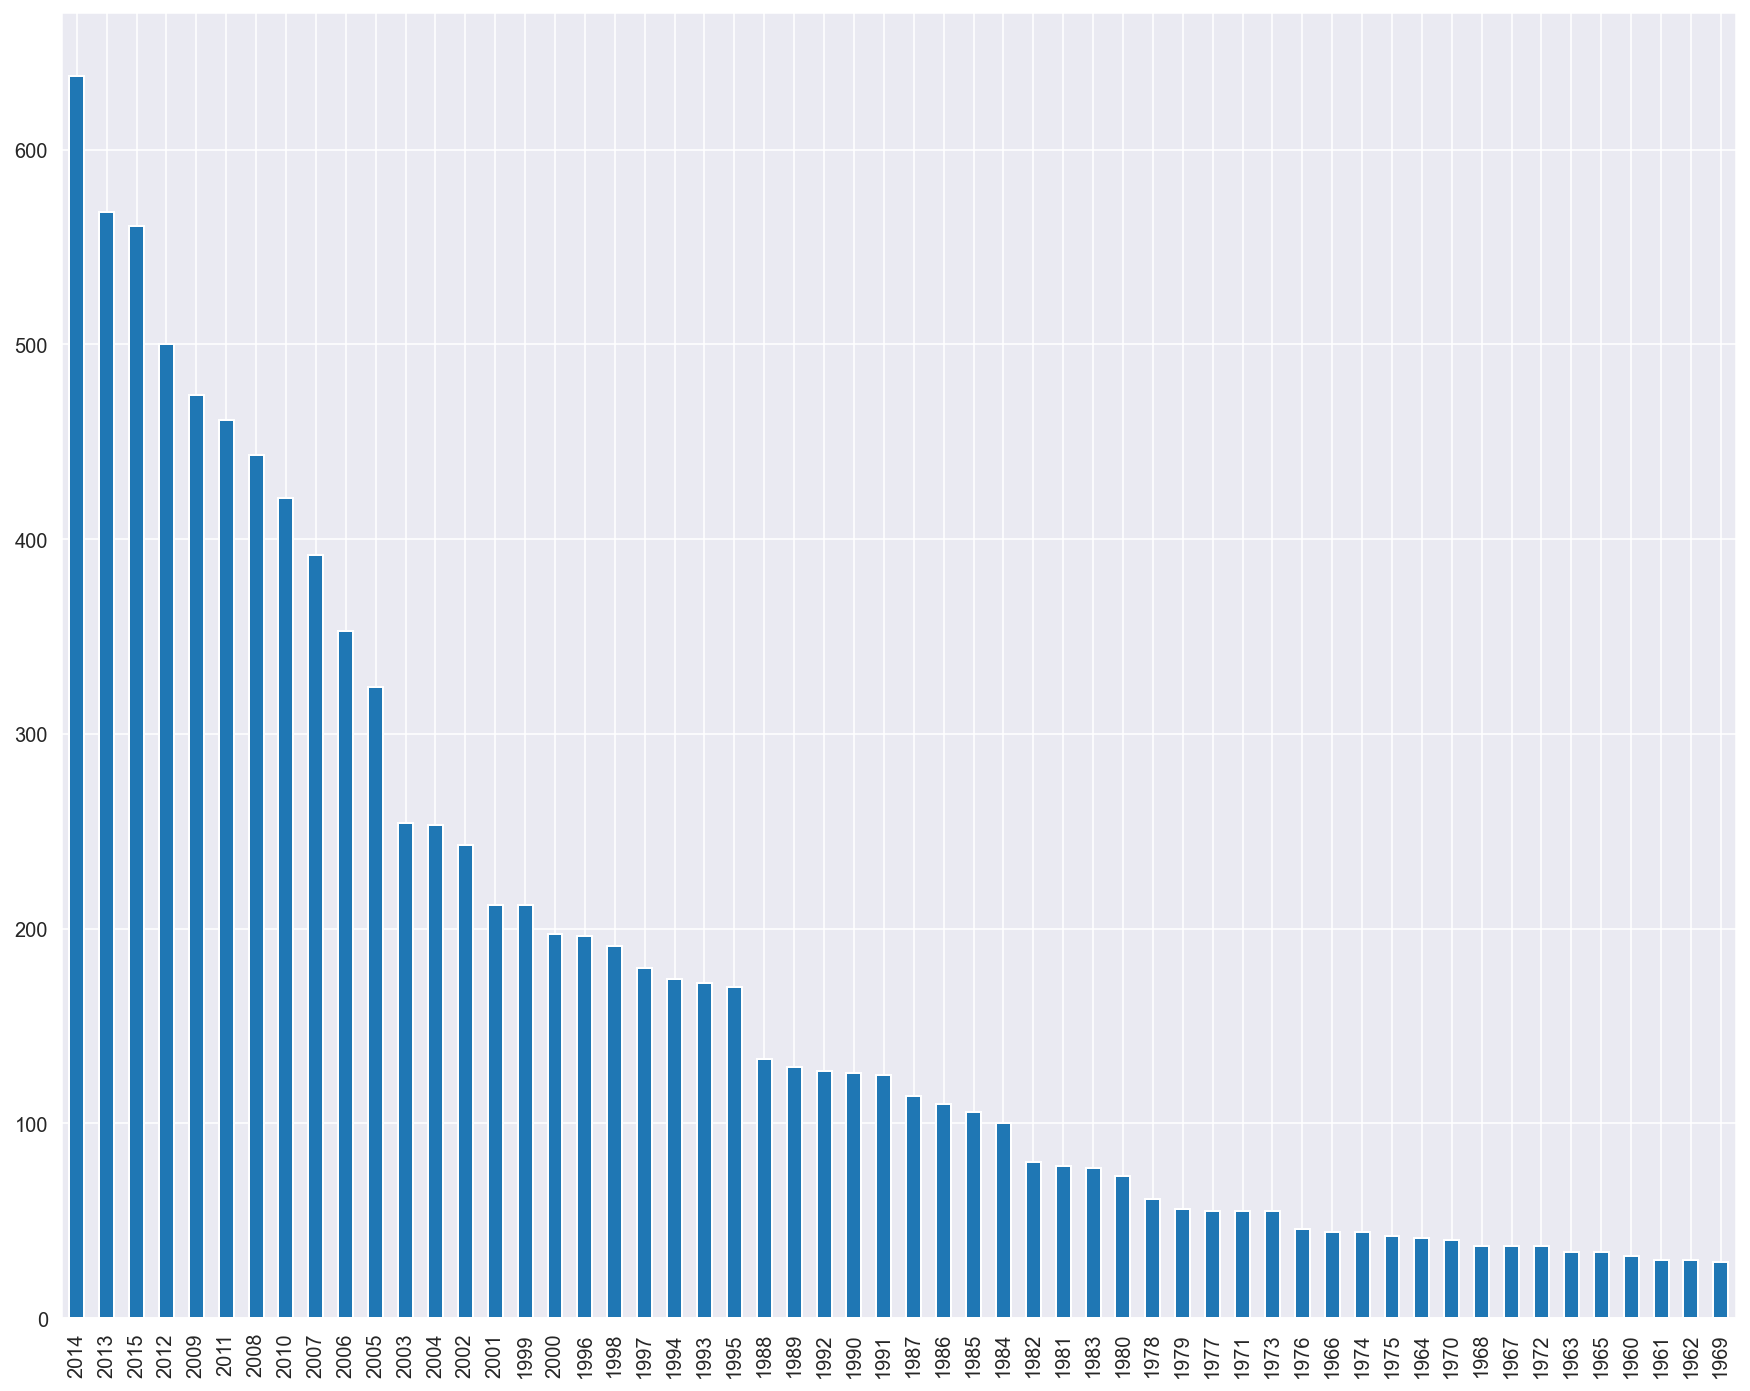

In [116]:
movies_df['release_year'].value_counts().plot(kind='bar',figsize=(15,12));

In [117]:
### Checking outliers using box plots
con_var =['popularity','budget','revenue','runtime','vote_count',
          'vote_average','budget_adj','release_year','revenue_adj']

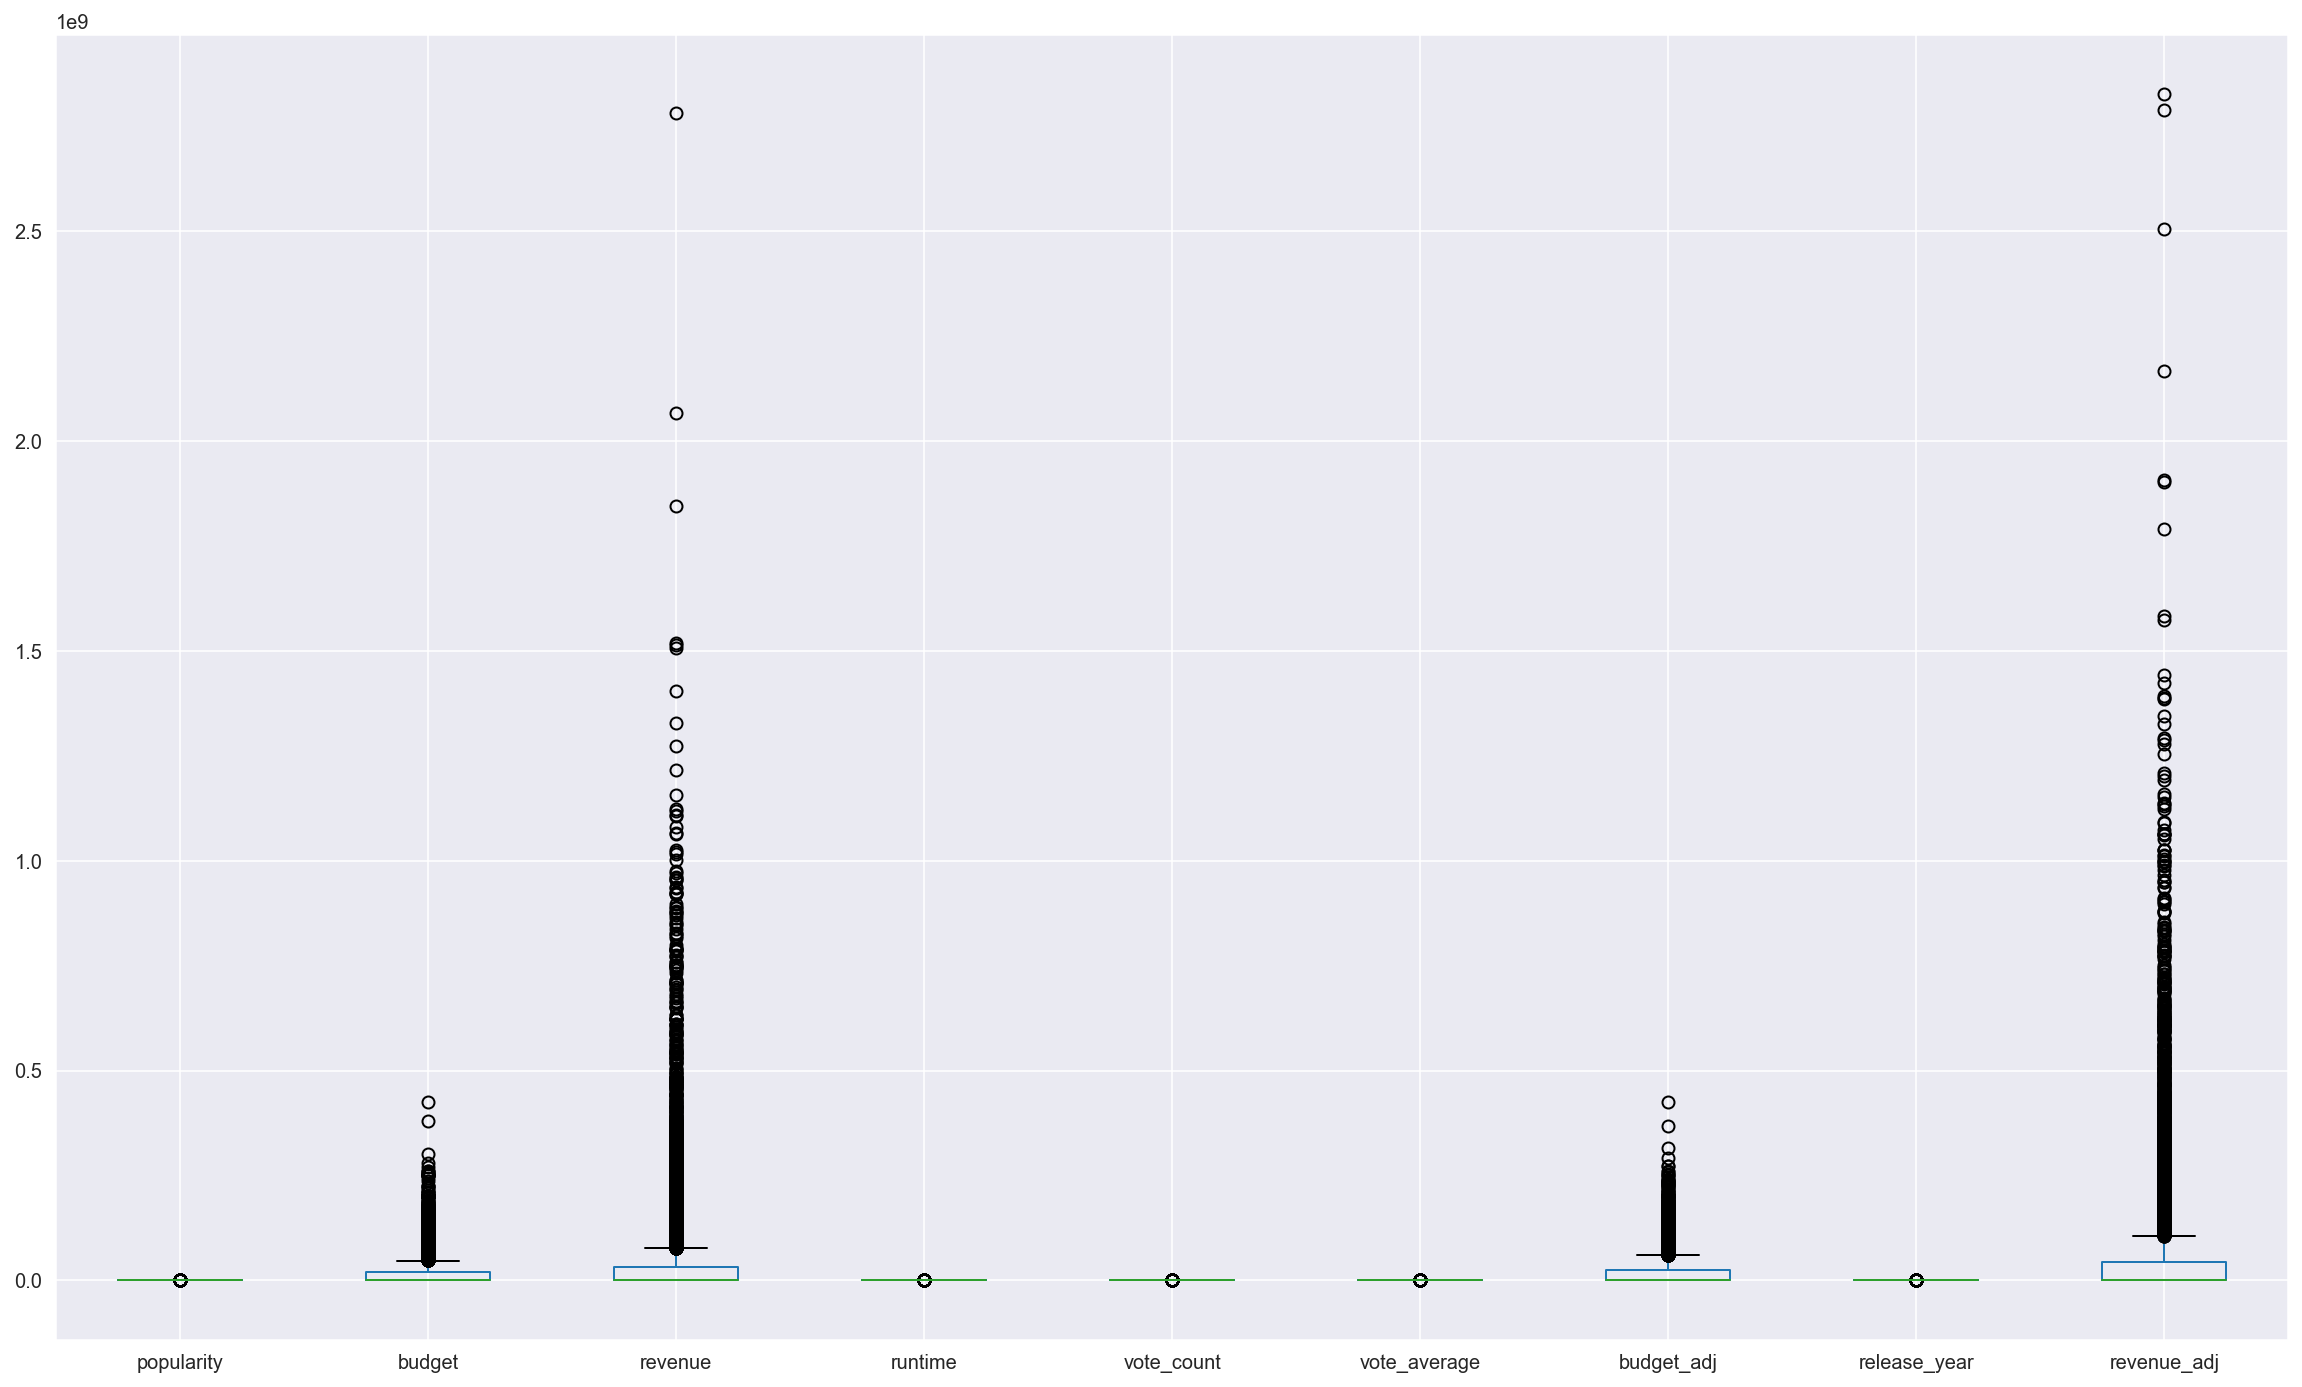

In [118]:
movies_df[con_var].boxplot(return_type = 'axes',figsize =(20,12))

Here We can see the outiers present in the variables revenue, revenue_adj, profits. As we know based on the popularity the revenue will be depended . so we neglect the outlier in this analysis

From the above graph, in 2014 Maximum number of movies are released 

## Which Production company produce maximum movies

In [119]:
movies_df['production_companies'].value_counts()

Paramount Pictures                                                     156
Universal Pictures                                                     133
Warner Bros.                                                            84
Walt Disney Pictures                                                    75
Metro-Goldwyn-Mayer (MGM)                                               72
                                                                      ... 
NBC|Hallmark Entertainment                                               1
O Entertainment|Morgan Creek Productions                                 1
Act III Communications|The Princess Bride Ltd.|Buttercup Films Ltd.      1
Senator Film Produktion|Mad Chance|Warner Bros.|Filmfour                 1
Castle Rock Entertainment|Screen Gems|Olive Bridge Entertainment         1
Name: production_companies, Length: 7423, dtype: int64

Paramount Pictures Production company has produced maximum pictures

## Which movie receives maximum and minimum profits

In [120]:
movies_df['profits'] = movies_df['revenue']-movies_df['budget']
movies_df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,228436354


In [121]:
df_p = movies_df.loc[:,["production_companies","budget", "original_title", "revenue","profits"]]
df_p.head()

,production_companies,budget,original_title,revenue,profits
0,Universal Studios|Amblin Entertainment|Legenda...,150000000,Jurassic World,1513528810,1363528810
1,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,Mad Max: Fury Road,378436354,228436354
2,Summit Entertainment|Mandeville Films|Red Wago...,110000000,Insurgent,295238201,185238201
3,Lucasfilm|Truenorth Productions|Bad Robot,200000000,Star Wars: The Force Awakens,2068178225,1868178225
4,Universal Pictures|Original Film|Media Rights ...,190000000,Furious 7,1506249360,1316249360


In [122]:
idx= df_p['profits'].idxmax()
idx

1386

In [123]:
df_p.loc[idx]

production_companies    Ingenious Film Partners|Twentieth Century Fox ...
budget                                                          237000000
original_title                                                     Avatar
revenue                                                        2781505847
profits                                                        2544505847
Name: 1386, dtype: object

In [124]:
ix = df_p['profits'].idxmin()
ix

2244

In [125]:
df_p.loc[ix]

production_companies    Boram Entertainment Inc.
budget                                 425000000
original_title                 The Warrior's Way
revenue                                 11087569
profits                               -413912431
Name: 2244, dtype: object

"Avatar" is the movie which receives maximum profits and "The Warriors Way" has least profits

## Which genre are most popular from year to year

#### Spliting the genres column to multiple rows

In [126]:
#splitting the geners data seperated by ""|""
genres_df = movies_df
genres_df = genres_df.drop('genres', axis=1).join(genres_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [127]:
#reseting the index of the dataset
genres_df.reset_index(inplace = True)

In [128]:
genres_df.head()

,index,id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,genres
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Action
1,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Adventure
2,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Science Fiction
3,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Thriller
4,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,228436354,Action


In [129]:
# creating bin edges for release year to convert them as decades
bin_edges =['1960','1970','1980','1990','2000','2010','2020']

In [130]:
bin_labels = ['1960','1970','1980','1990','2000','2010']

In [131]:
genres_df['release_decade']= pd.cut(genres_df['release_year'], bin_edges, labels = bin_labels)
genres_df.head()

,index,id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,genres,release_decade
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Action,2010
1,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Adventure,2010
2,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Science Fiction,2010
3,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Thriller,2010
4,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,228436354,Action,2010


In [132]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 24712 non-null  int64         
 1   id                    24712 non-null  int64         
 2   popularity            24712 non-null  float64       
 3   budget                24712 non-null  int64         
 4   revenue               24712 non-null  int64         
 5   original_title        24712 non-null  object        
 6   director              24712 non-null  object        
 7   runtime               24712 non-null  int64         
 8   production_companies  24712 non-null  object        
 9   release_date          24712 non-null  datetime64[ns]
 10  vote_count            24712 non-null  int64         
 11  vote_average          24712 non-null  float64       
 12  release_year          24712 non-null  int64         
 13  budget_adj      

Text(0.5, 1.0, 'Count of different Genres from 1960 to 2010')

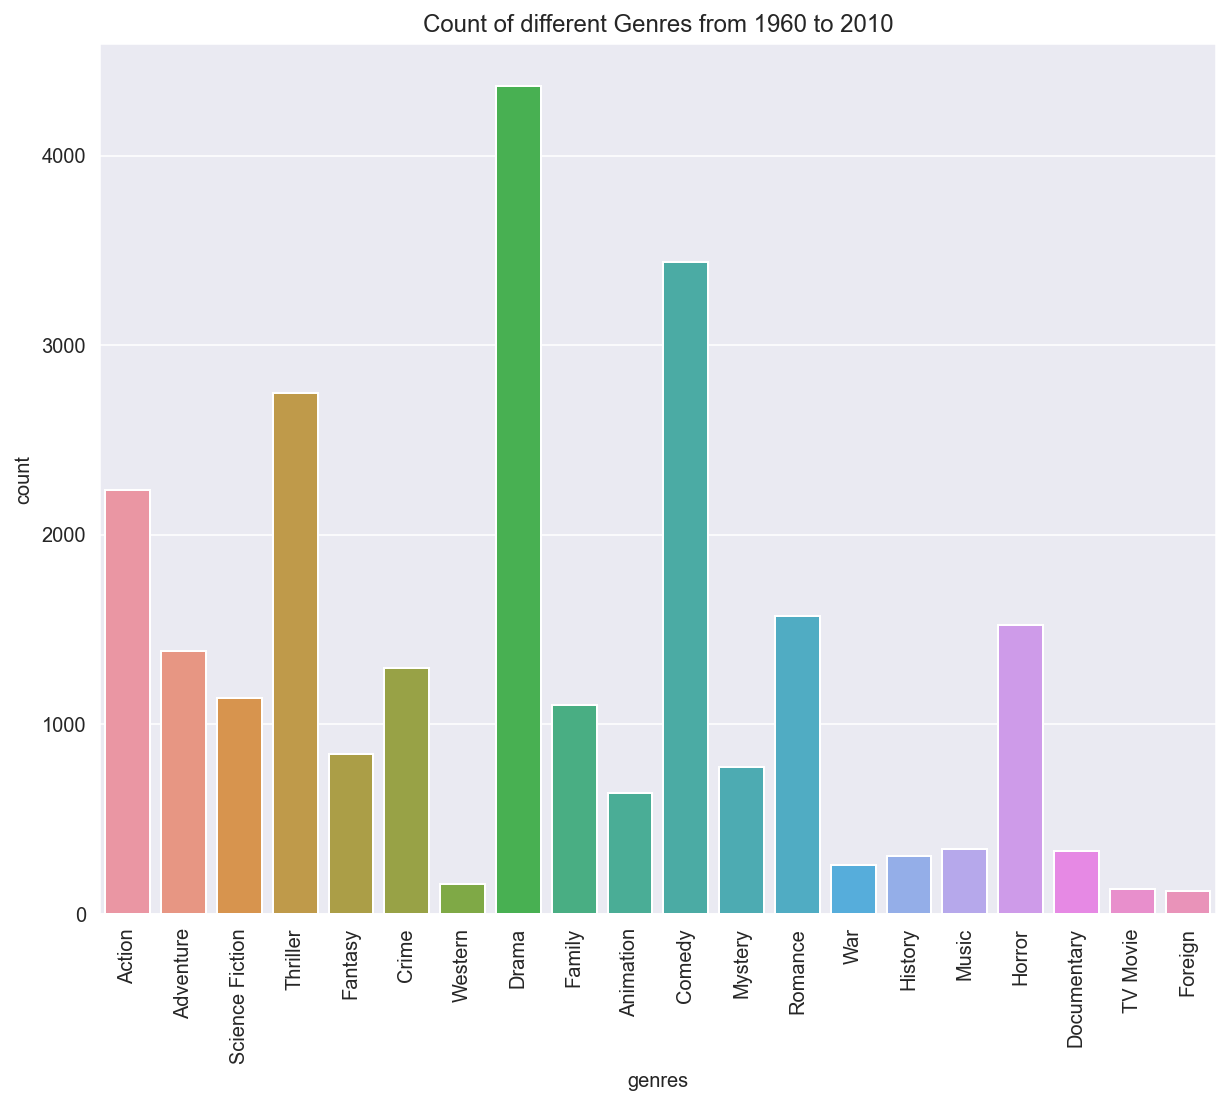

In [133]:
plt.figure(figsize=(10,8));
sns.countplot(genres_df["genres"]);
plt.xticks(rotation=90);
plt.title("Count of different Genres from 1960 to 2010")

Out of all genres, Drama genre has highest number of releases over the period of time.

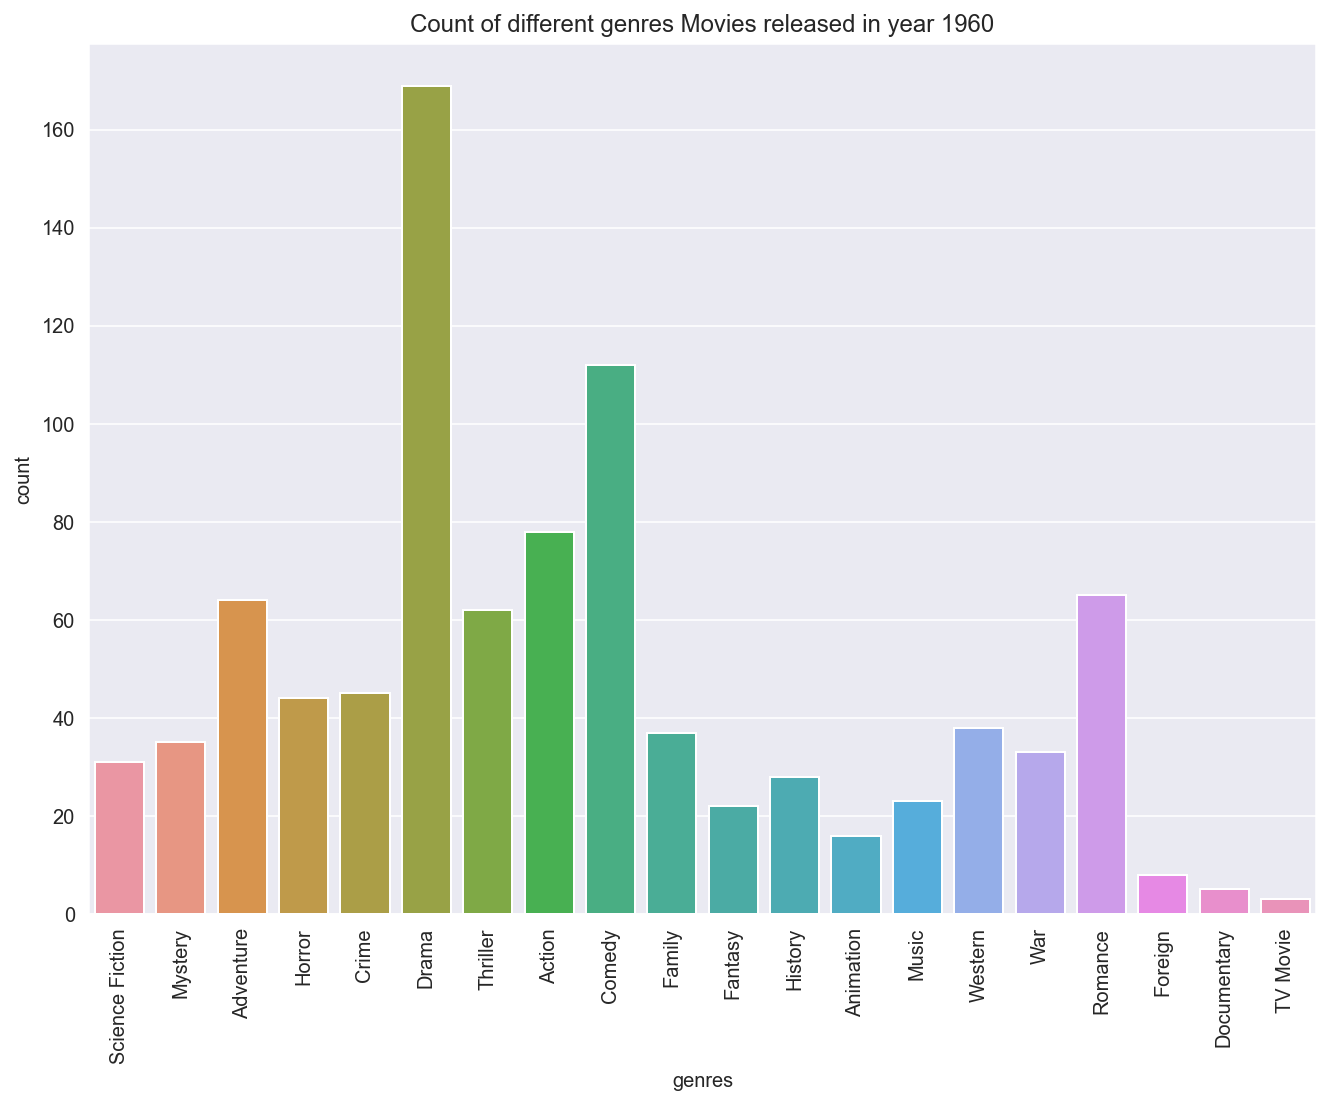

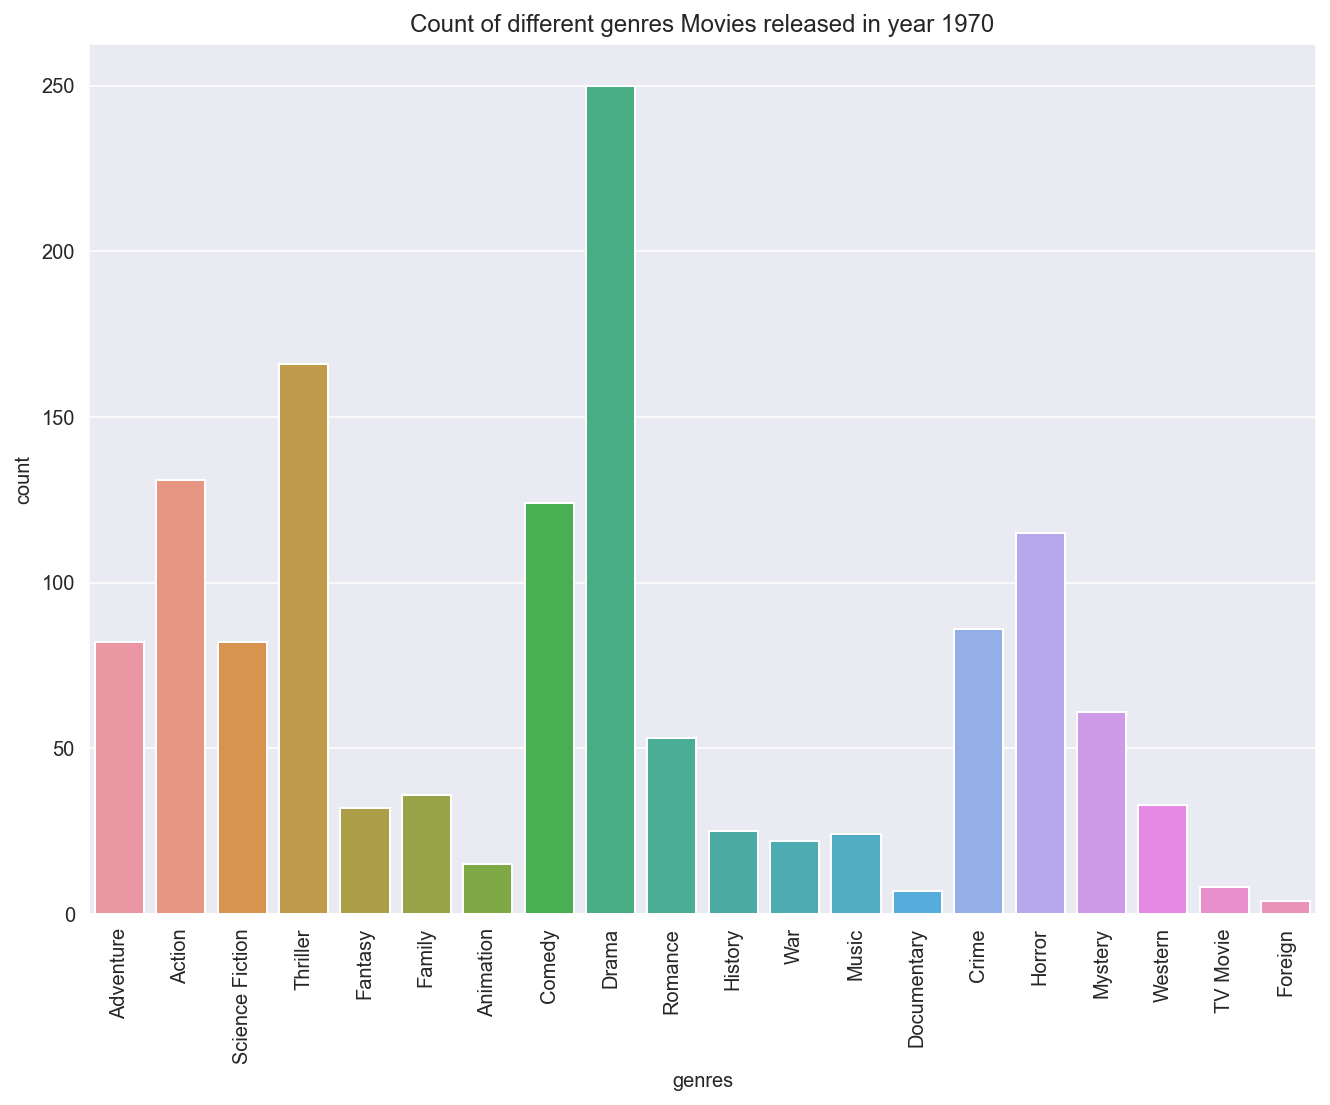

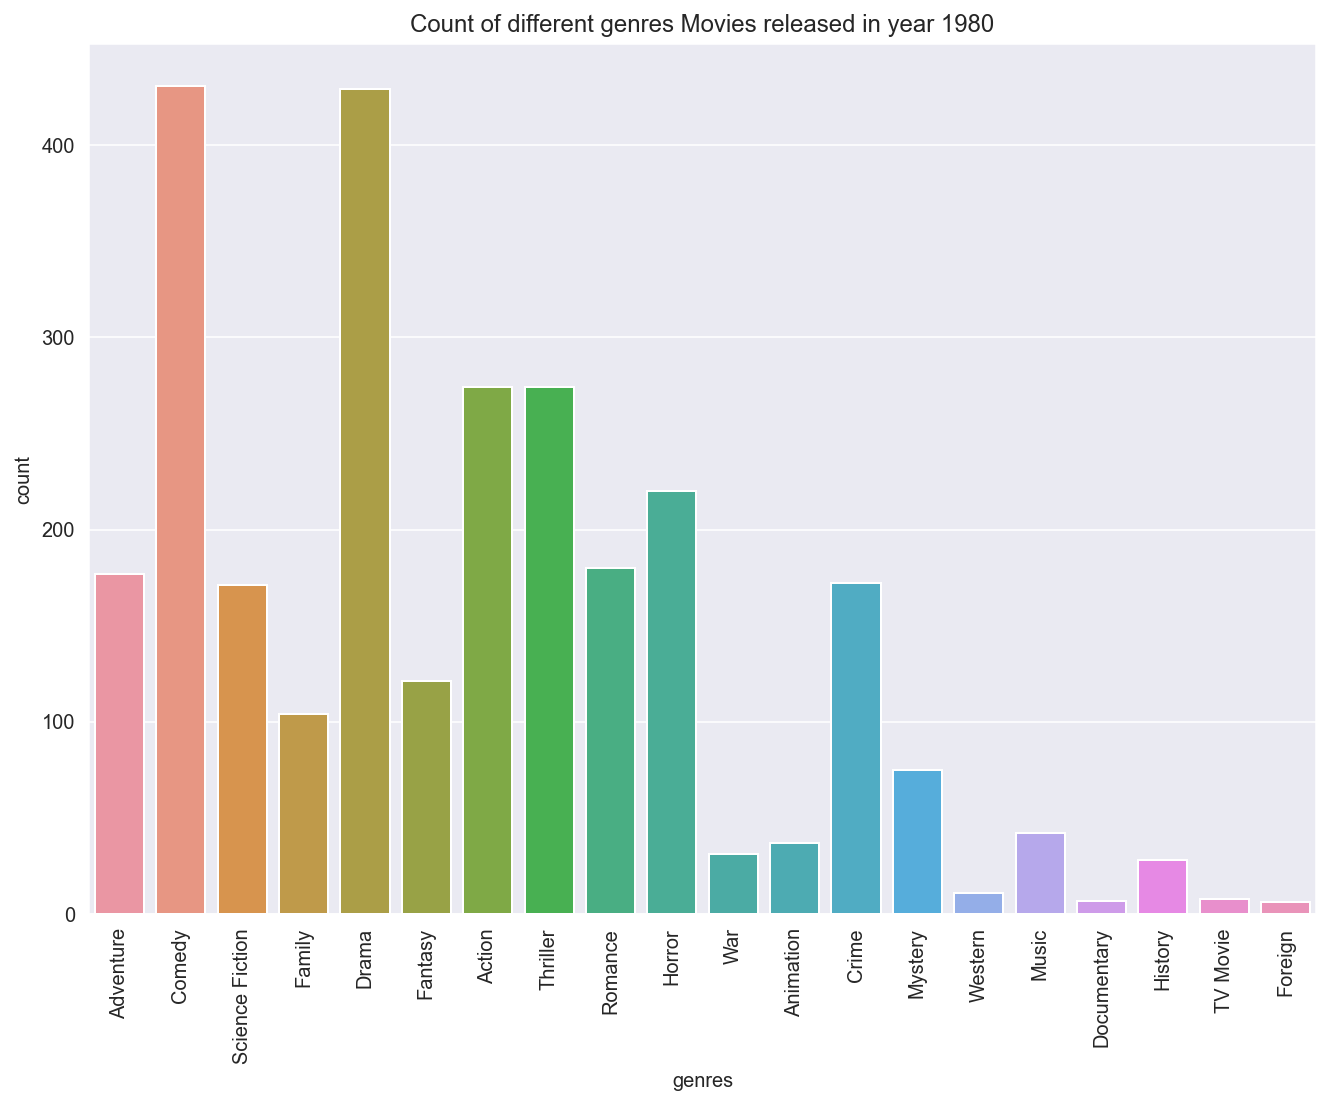

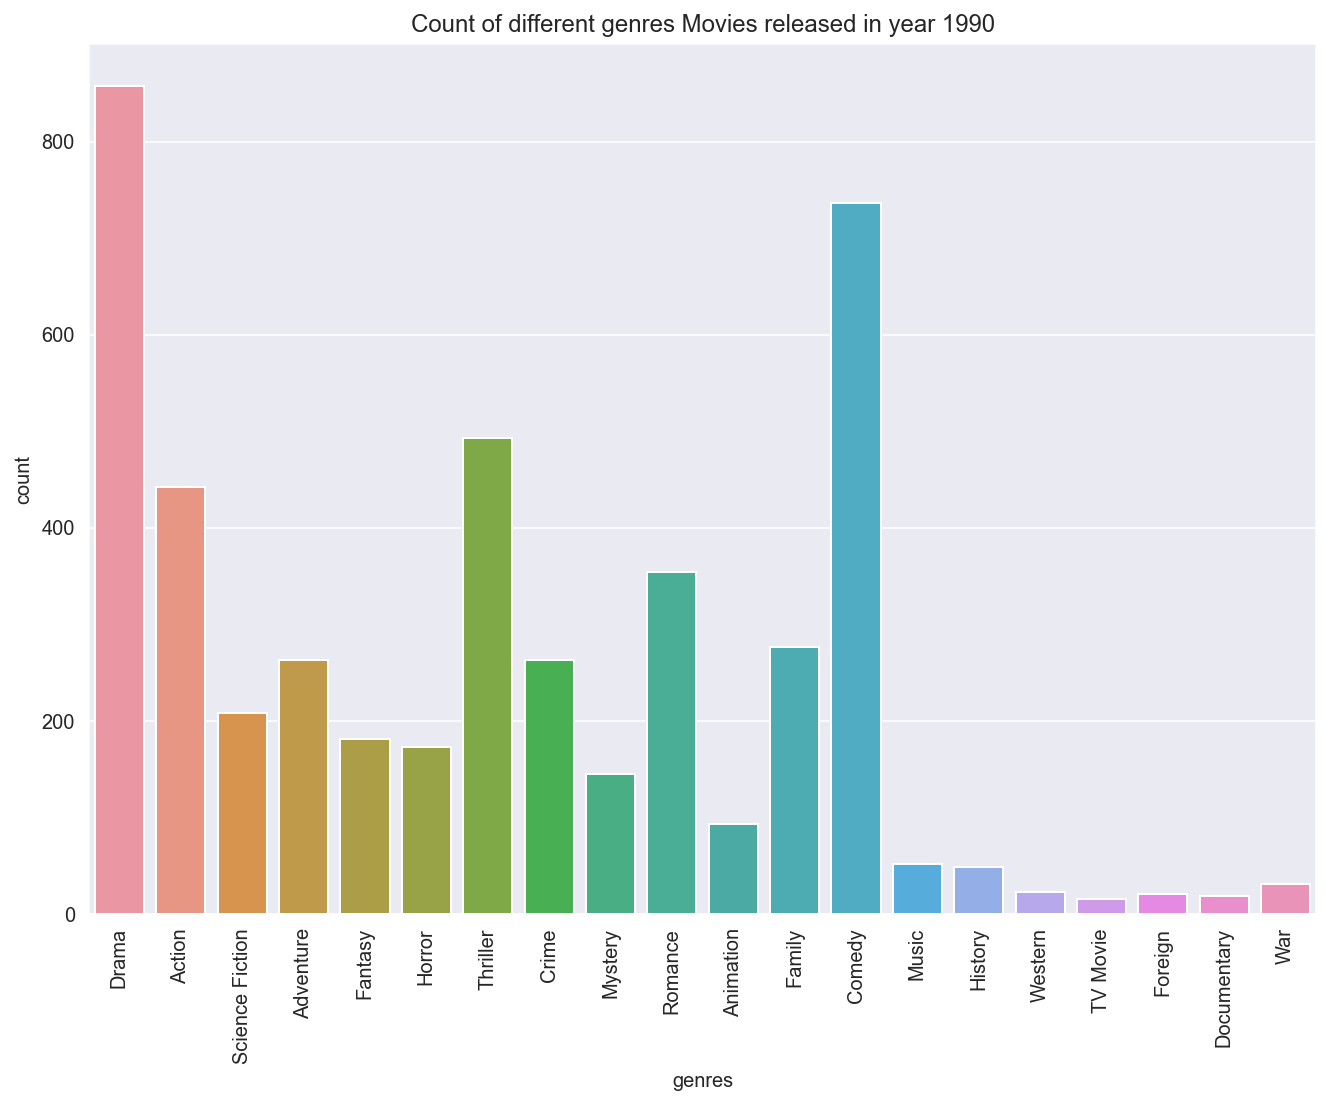

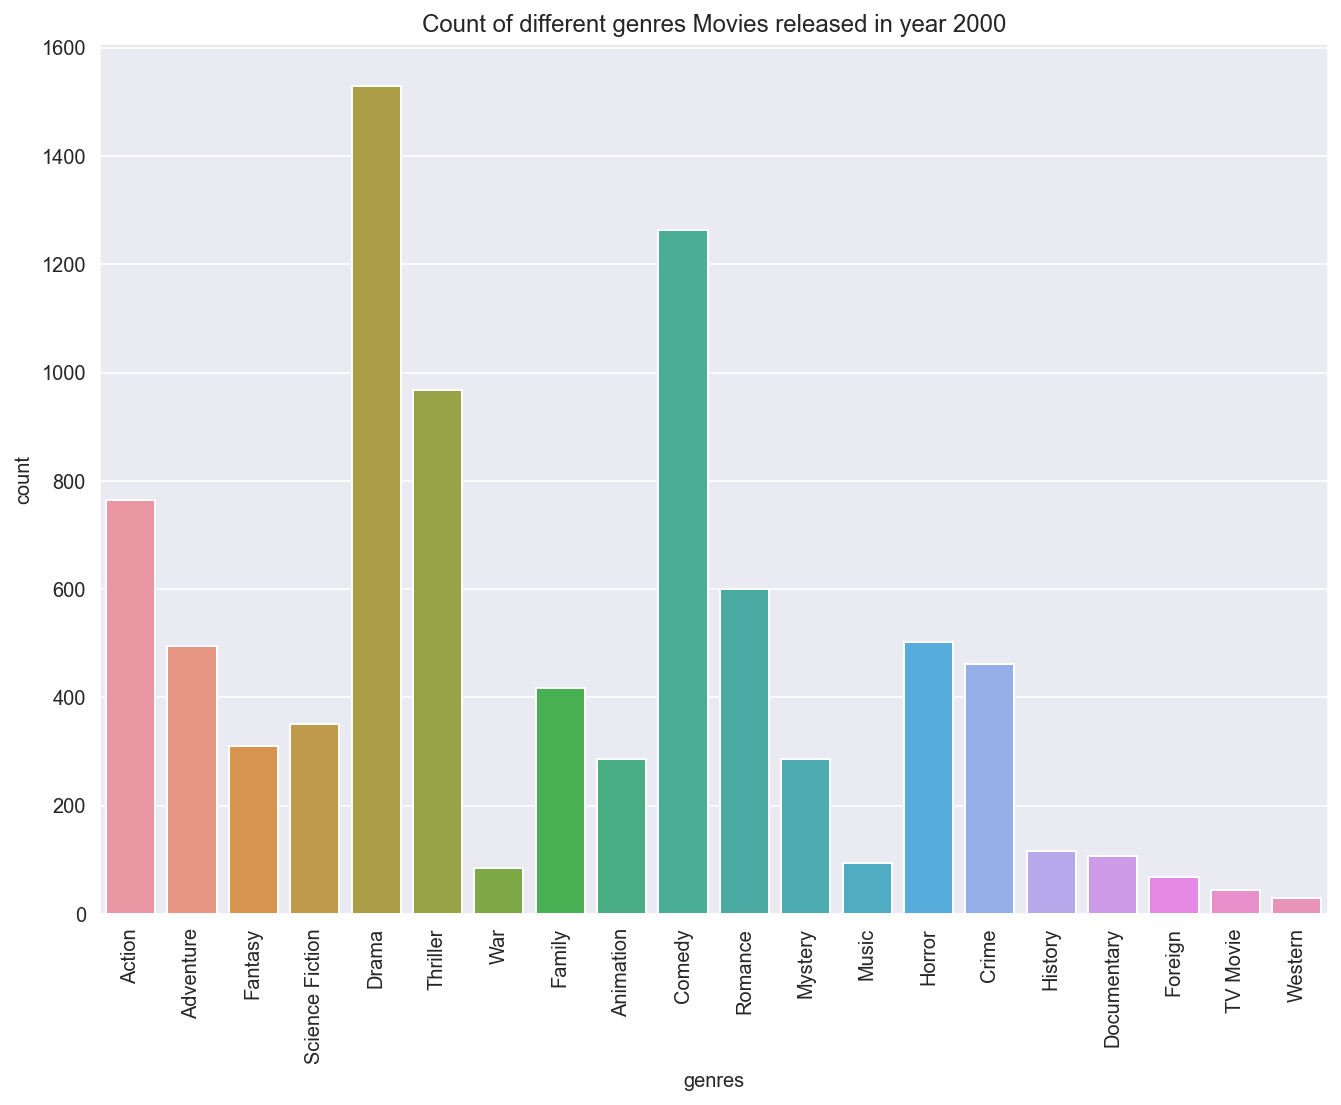

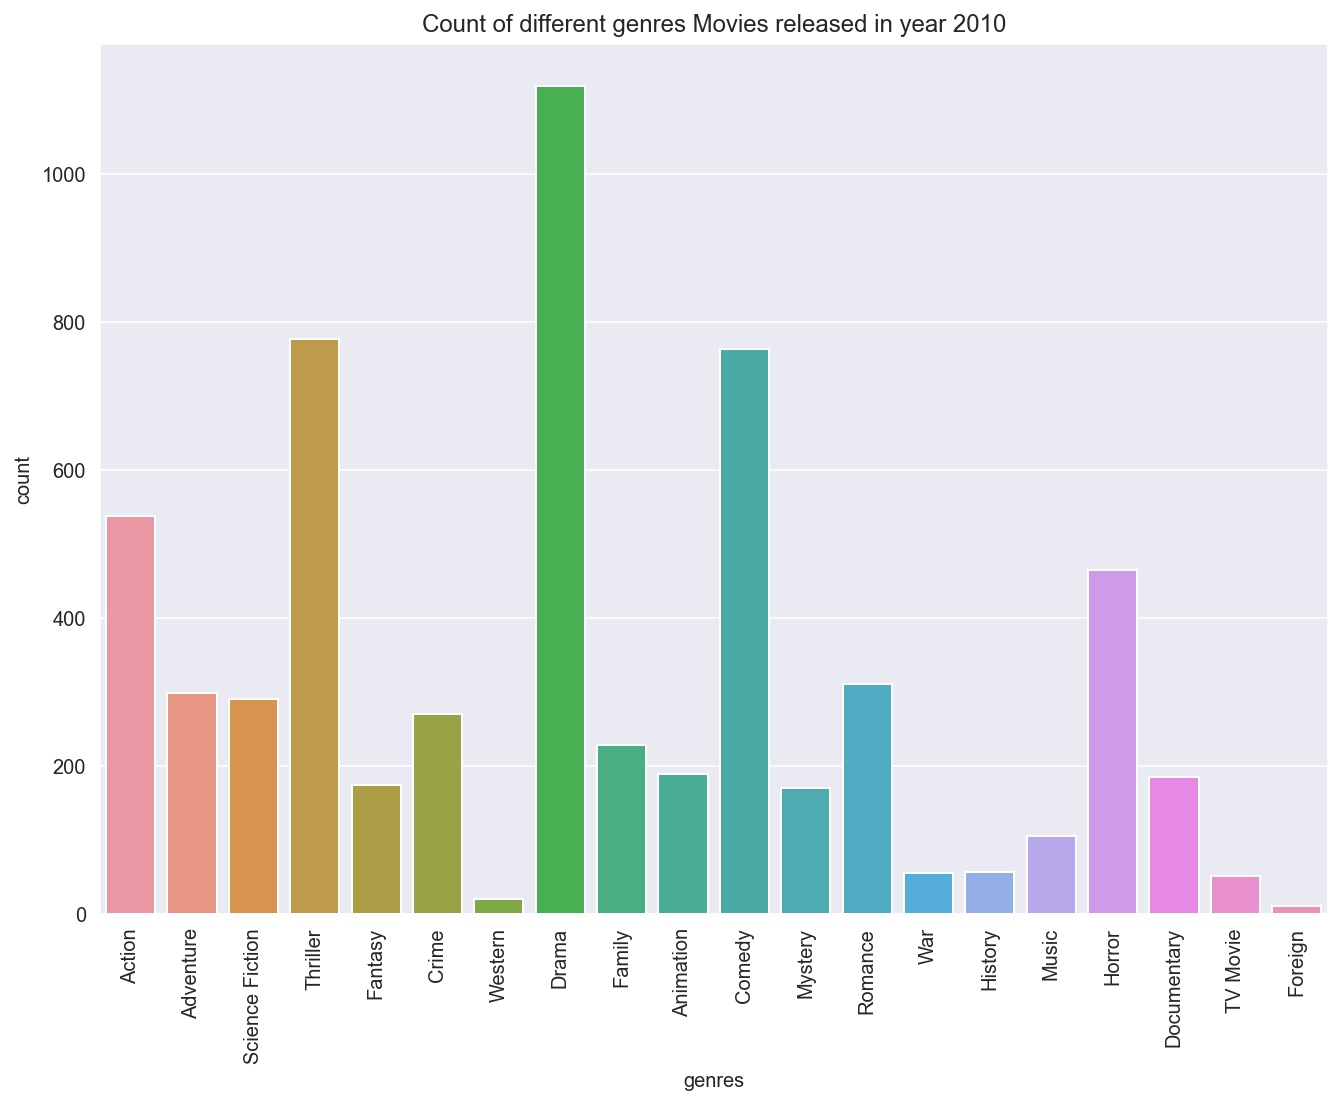

In [134]:
decades = ["1960","1970","1980","1990","2000","2010"]
for i in decades:
    plt.figure(figsize=(11,8));
    #plt.subplots(1,2)
    df = genres_df[genres_df["release_decade"]== i]
    #plt.subplots()
    #fig.set_size_inches(11.7, 8.27)
    sns.countplot(df["genres"]);
    plt.xticks(rotation=90);
    plt.title("Count of different genres Movies released in year "+i)

Over the period of decades, the Drama genre movies are released more followed by comedy genre

In [135]:
# selecting the release decade, genre and popularity mean
df_dec=genres_df.groupby(['release_decade','genres'], as_index = False)['popularity'].mean()
df_dec

,release_decade,genres,popularity
0,1960,Action,0.494114
1,1960,Adventure,0.739897
2,1960,Animation,0.908881
3,1960,Comedy,0.427080
4,1960,Crime,0.465051
...,...,...,...
115,2010,Science Fiction,1.756172
116,2010,TV Movie,0.307908
117,2010,Thriller,0.986554
118,2010,War,1.097696


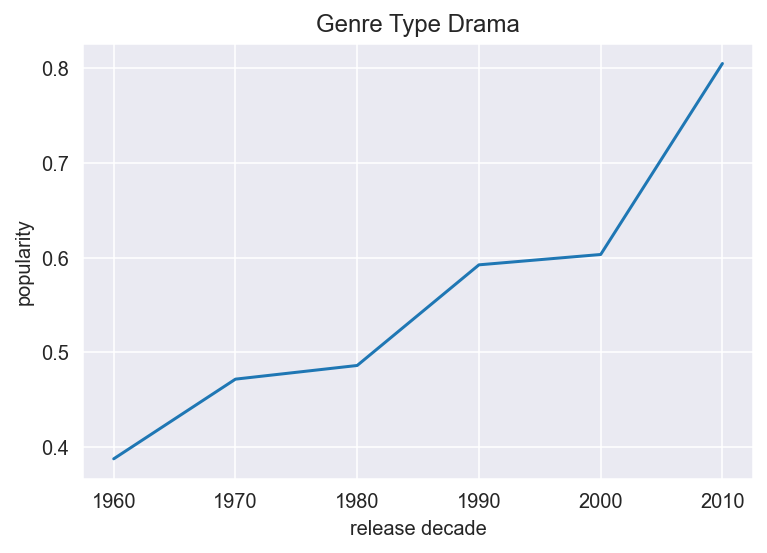

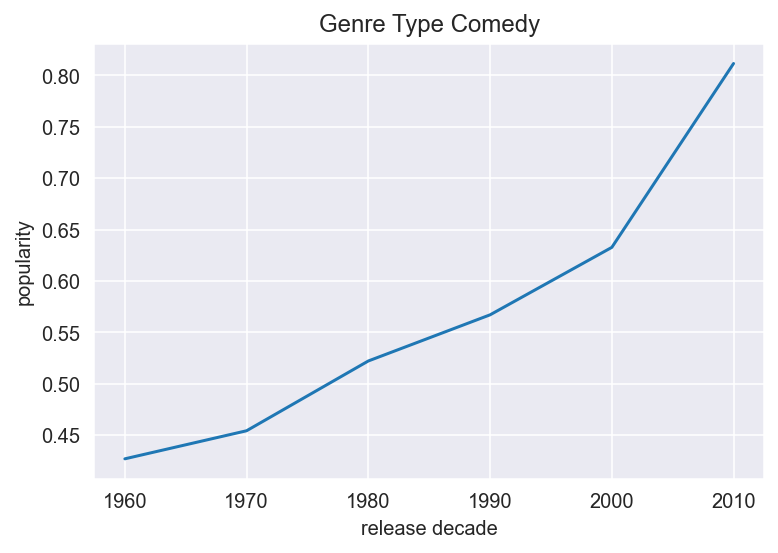

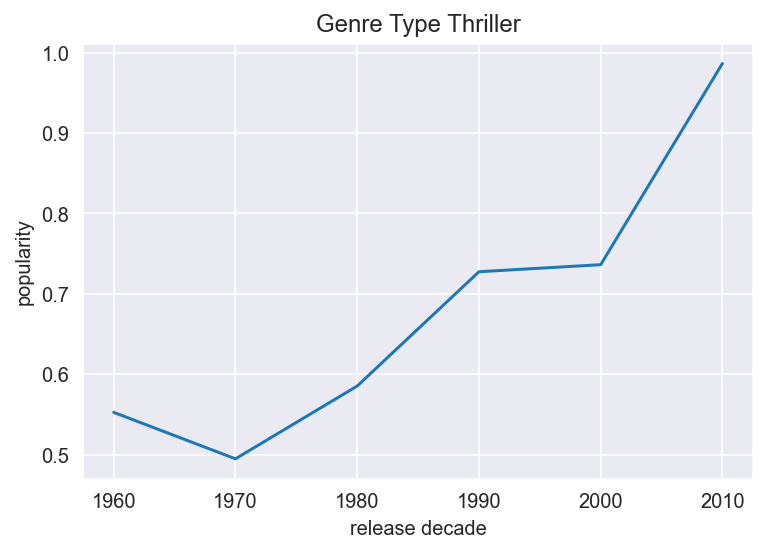

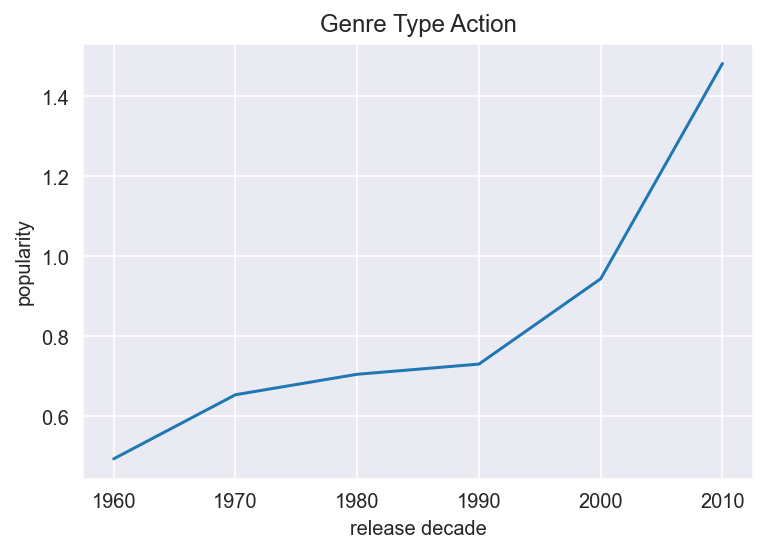

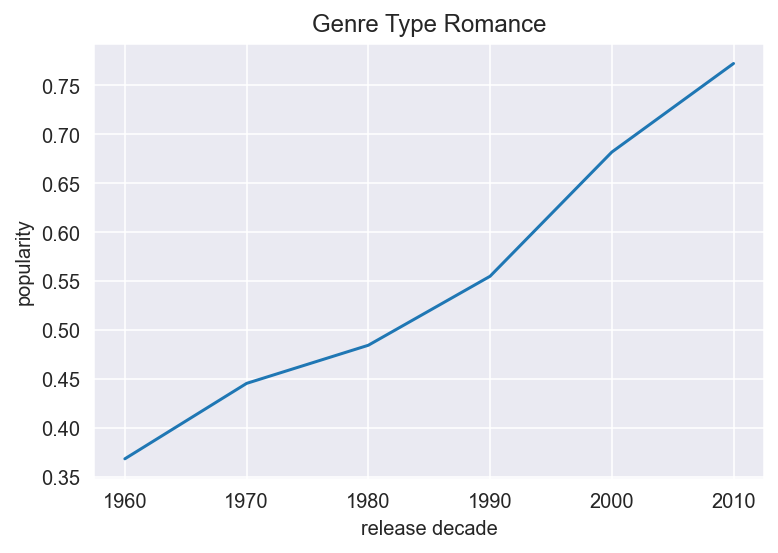

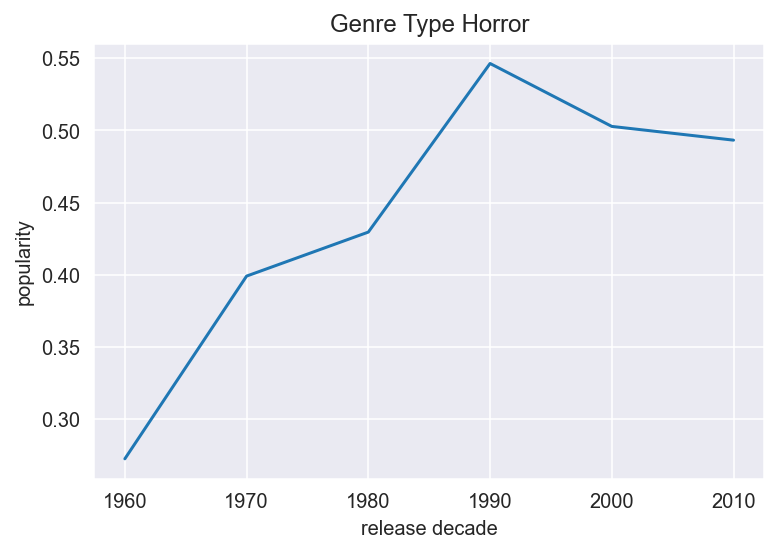

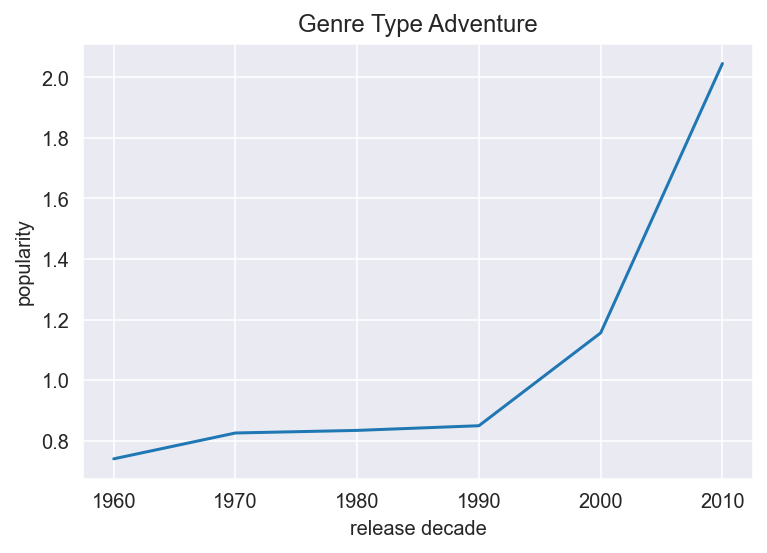

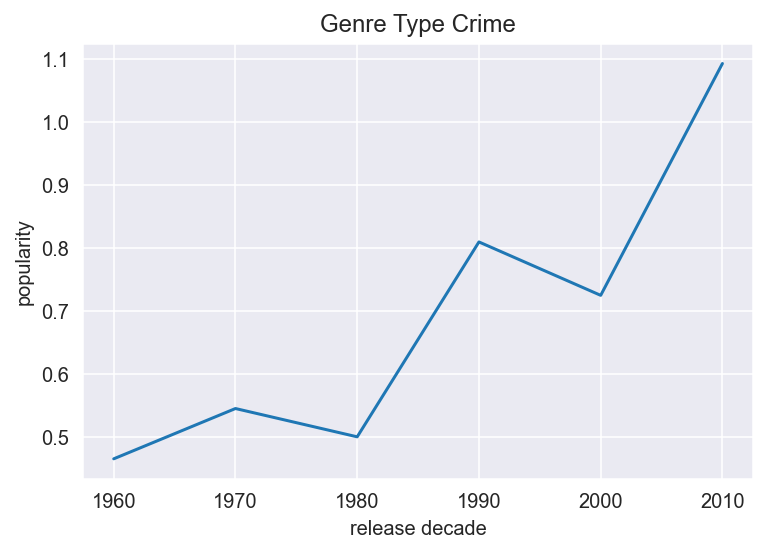

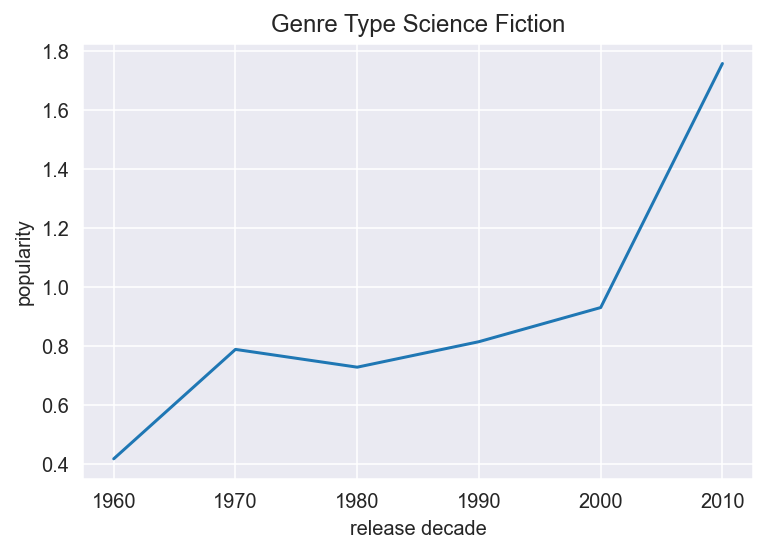

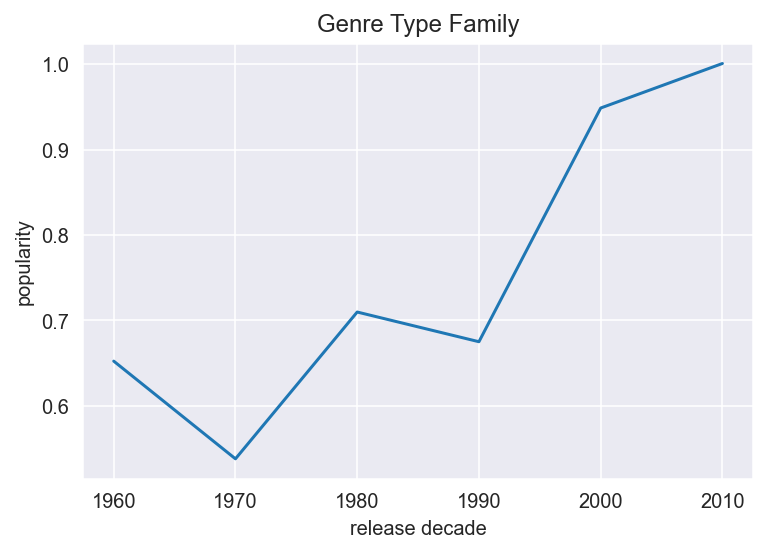

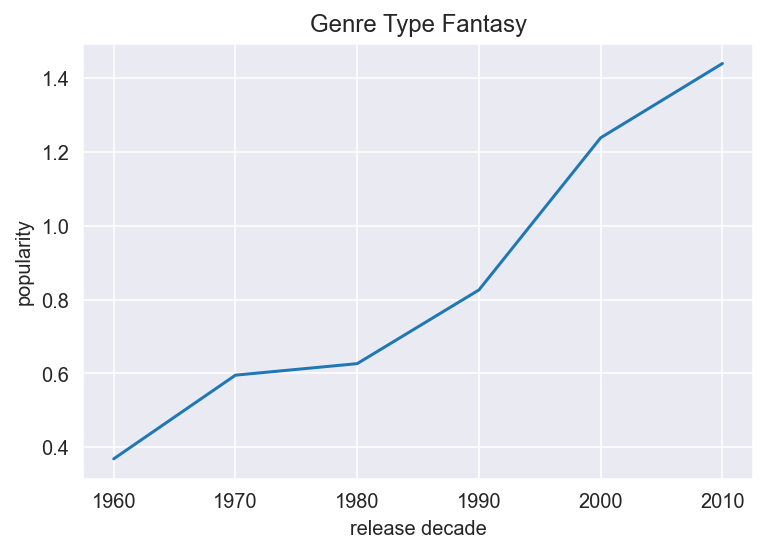

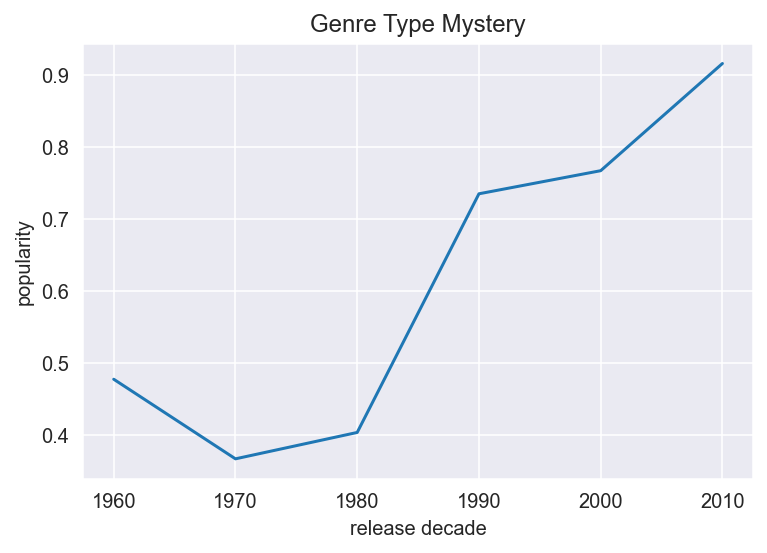

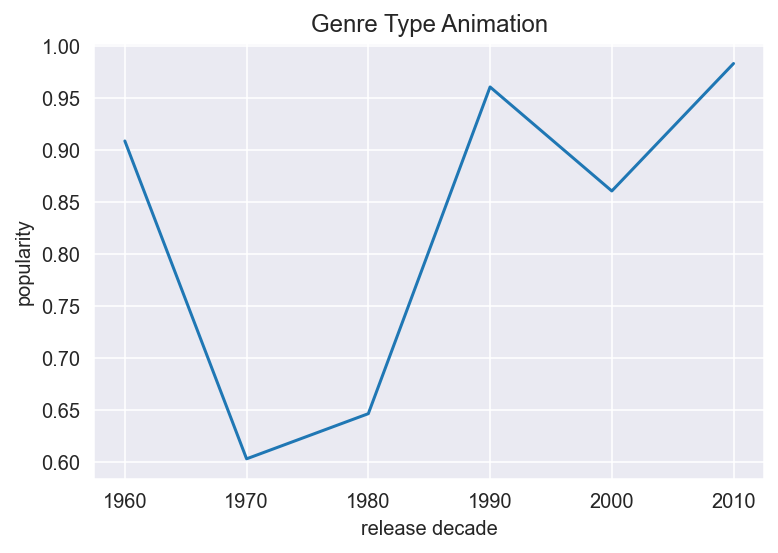

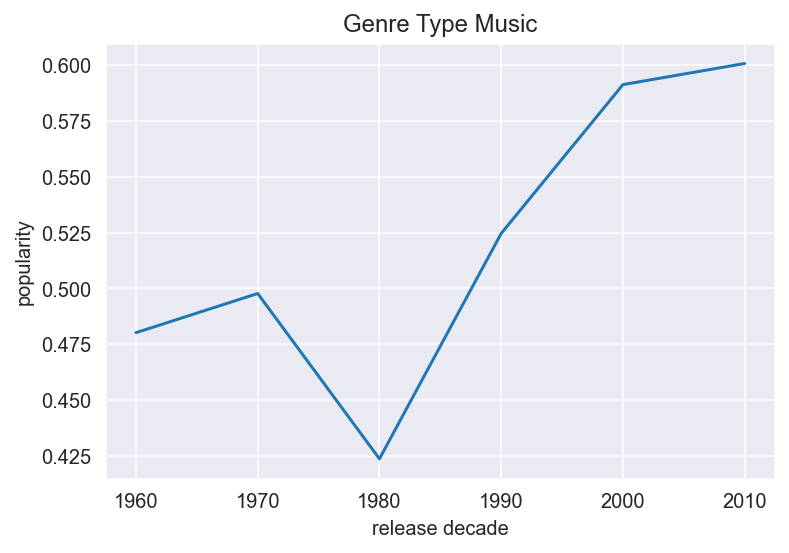

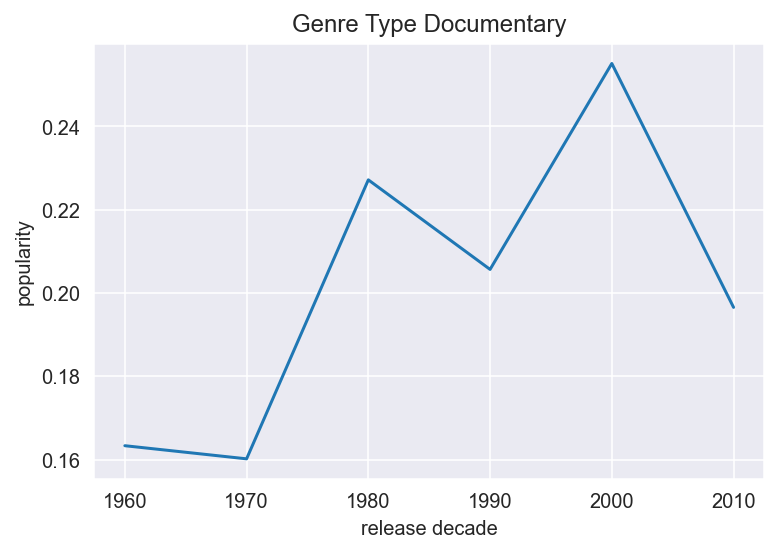

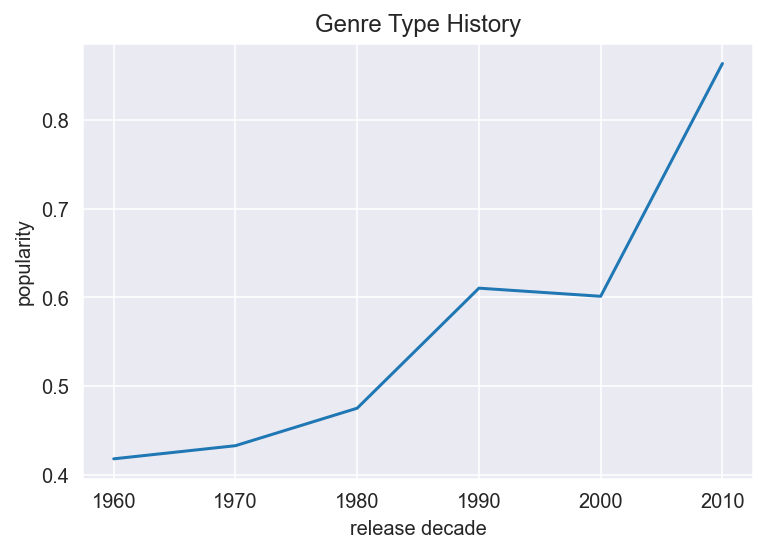

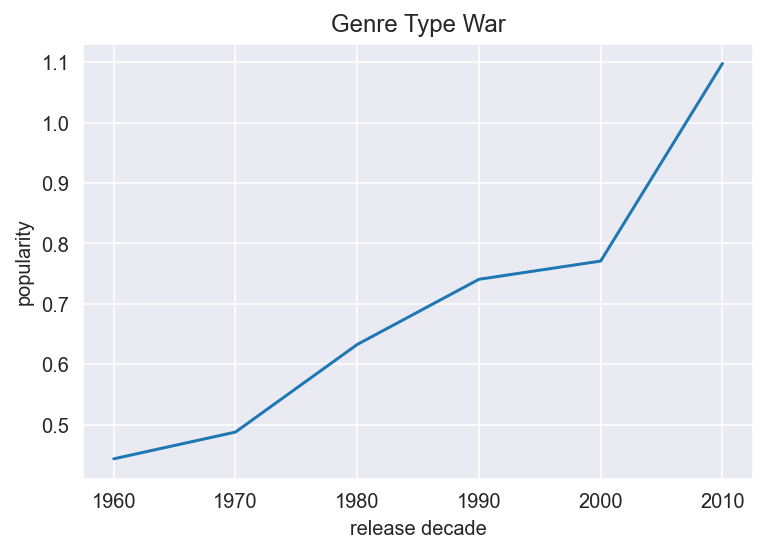

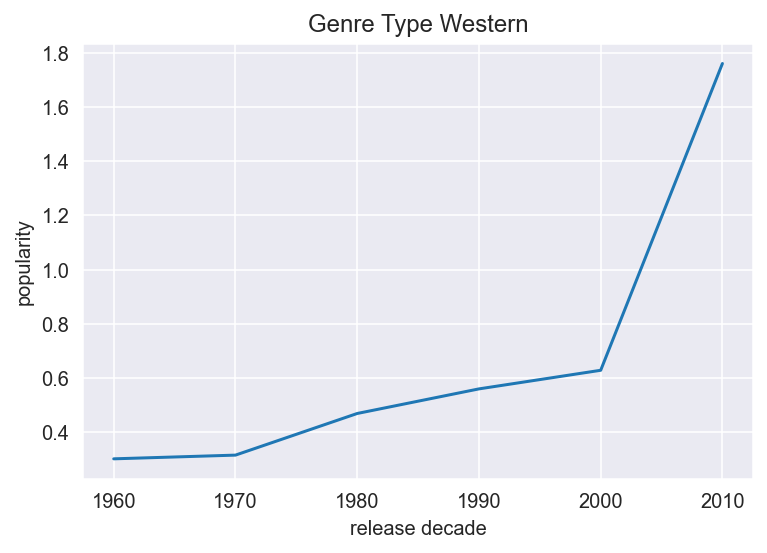

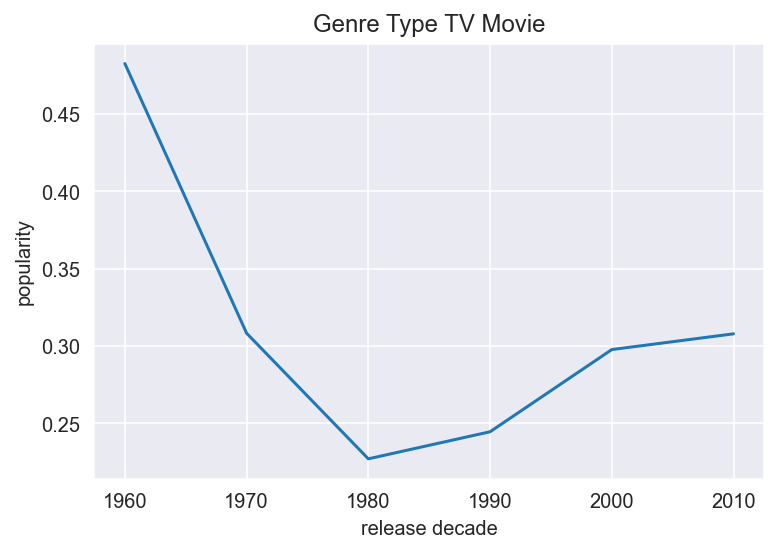

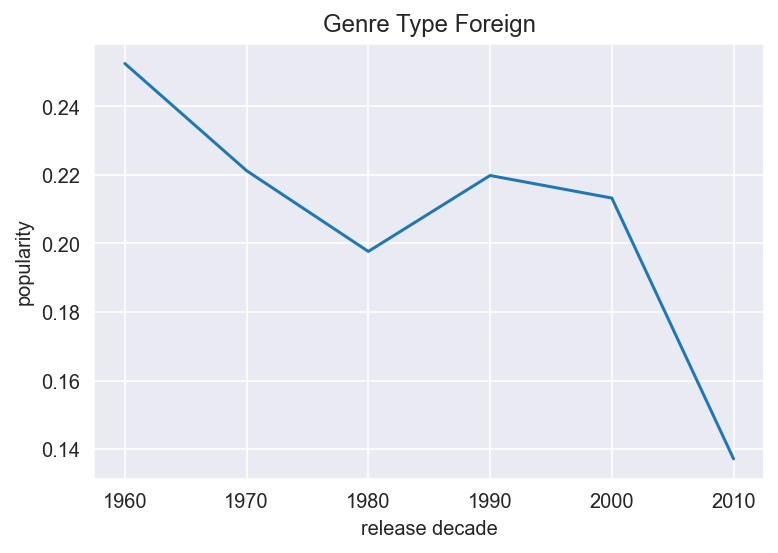

In [136]:
# plotting genres type over the decades and popularity
for i in genres_df["genres"].value_counts().index:   
    lables=["1960","1970","1980","1990","2000","2010"]
    Data= df_dec[df_dec["genres"]==i]

    plt.plot(Data["release_decade"],Data["popularity"])
    plt.xticks(lables)
    plt.title("Genre Type "+i)
    plt.xlabel('release decade')
    plt.ylabel('popularity')
    plt.show()

Over the period of time, most of the genres become popular except few genres like foreign, Tv movie. Remaining all genres popularity incresed gradually as time moves on. 

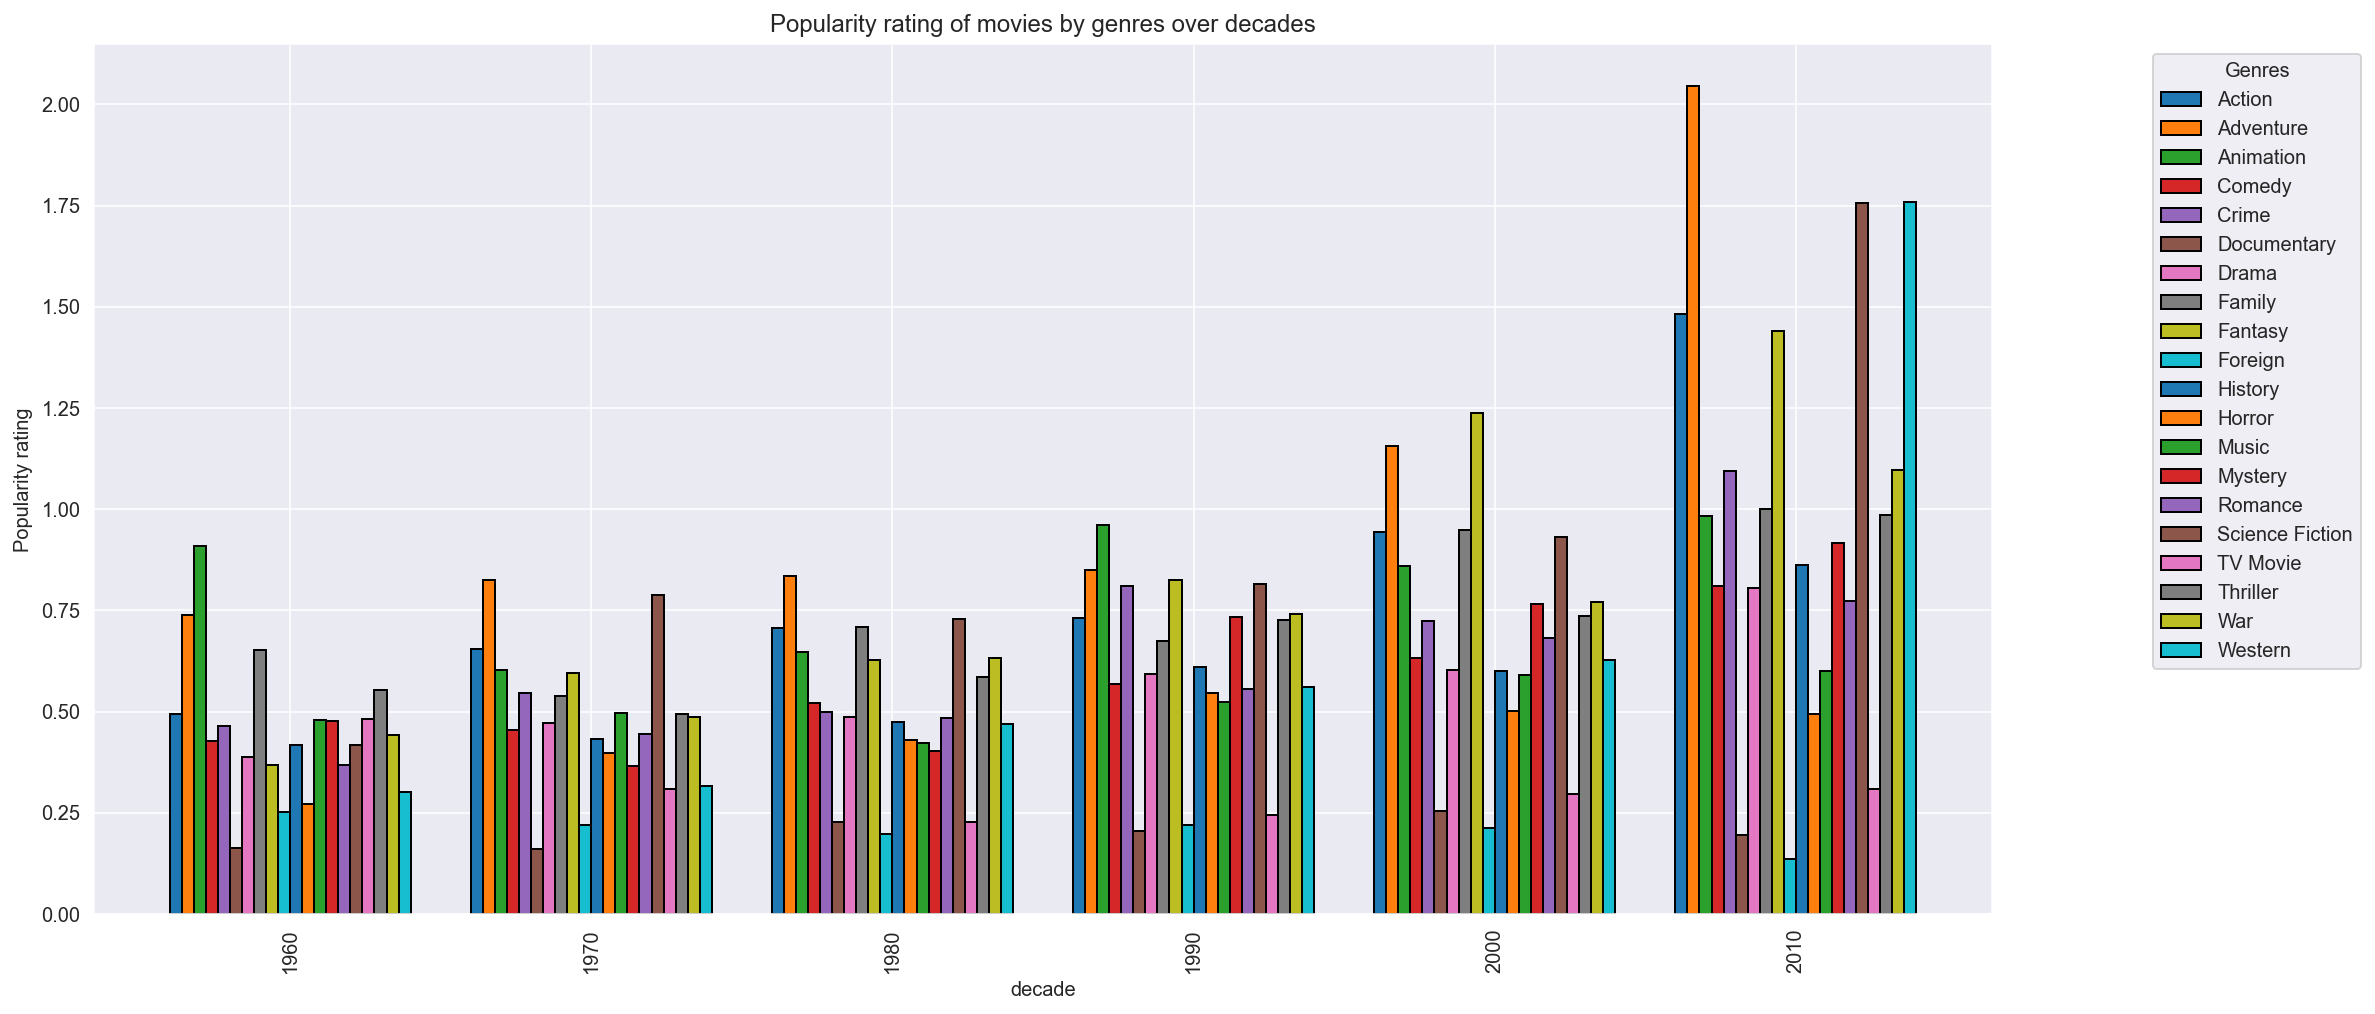

In [137]:
df_genres = df_dec.pivot("release_decade", "genres", "popularity")
X = np.arange(4)
df_genres.plot(kind='bar',width=0.8,figsize=(17,8), edgecolor = "black")
plt.legend(bbox_to_anchor=(1.2,1), loc='upper right', ncol=1,title="Genres")
plt.title("Popularity rating of movies by genres over decades")
plt.xlabel("decade")
plt.ylabel("Popularity rating")
plt.show()

As we observe from the above graph,genres like Action, Adventure, comedy, gradually increases popularity every decade.
Adventure genre has high popularity rating over all decades and foreign type genre has least popularity rating over all decades

## Which genre is more profitable?

In [138]:
df = genres_df[['original_title','profits','genres']]
df.head()

,original_title,profits,genres
0,Jurassic World,1363528810,Action
1,Jurassic World,1363528810,Adventure
2,Jurassic World,1363528810,Science Fiction
3,Jurassic World,1363528810,Thriller
4,Mad Max: Fury Road,228436354,Action


In [139]:
df1 = df.groupby(['genres']).mean()

In [140]:
df1['profits_million'] = df1['profits']/1000000
del df1['profits']

In [141]:
df1.sort_values('profits_million', ascending=False, inplace = True )

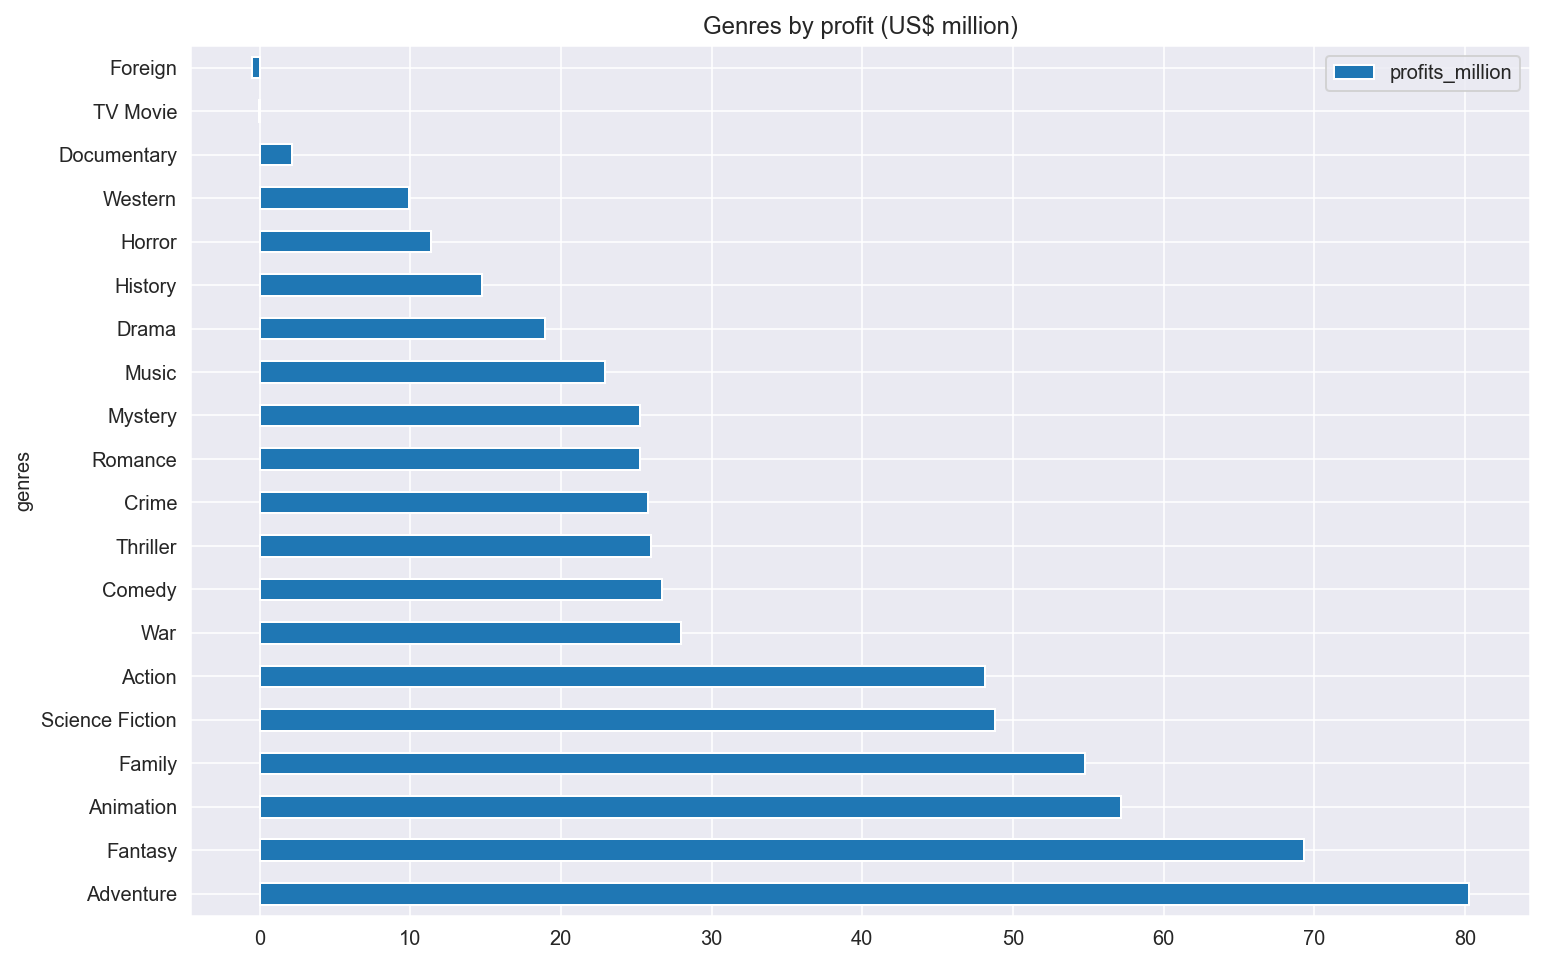

In [142]:
df1[['profits_million']].plot.barh(stacked=True, title = 'Genres by profit (US$ million)', figsize=(12, 8));

Adventure genre has more profits followed by fantasy, animation, family respectively.

## Average duration by genre?

In [143]:
genres_df.head()

,index,id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,genres,release_decade
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Action,2010
1,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Adventure,2010
2,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Science Fiction,2010
3,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1363528810,Thriller,2010
4,1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,228436354,Action,2010


In [144]:
# selecting the columns required fro analysis
df_1 = genres_df[['original_title','genres','runtime']]
df_1

,original_title,genres,runtime
0,Jurassic World,Action,124
1,Jurassic World,Adventure,124
2,Jurassic World,Science Fiction,124
3,Jurassic World,Thriller,124
4,Mad Max: Fury Road,Action,120
...,...,...,...
24707,Beregis Avtomobilya,Mystery,94
24708,Beregis Avtomobilya,Comedy,94
24709,"What's Up, Tiger Lily?",Action,80
24710,"What's Up, Tiger Lily?",Comedy,80


In [145]:
# calculating the genres column mean using groupby
df1 = df_1.groupby(['genres']).mean()
df1['Average_duration'] = df1['runtime'].round(2)
del df1['runtime']

In [146]:
df1.sort_values('Average_duration', ascending=False, inplace = True )

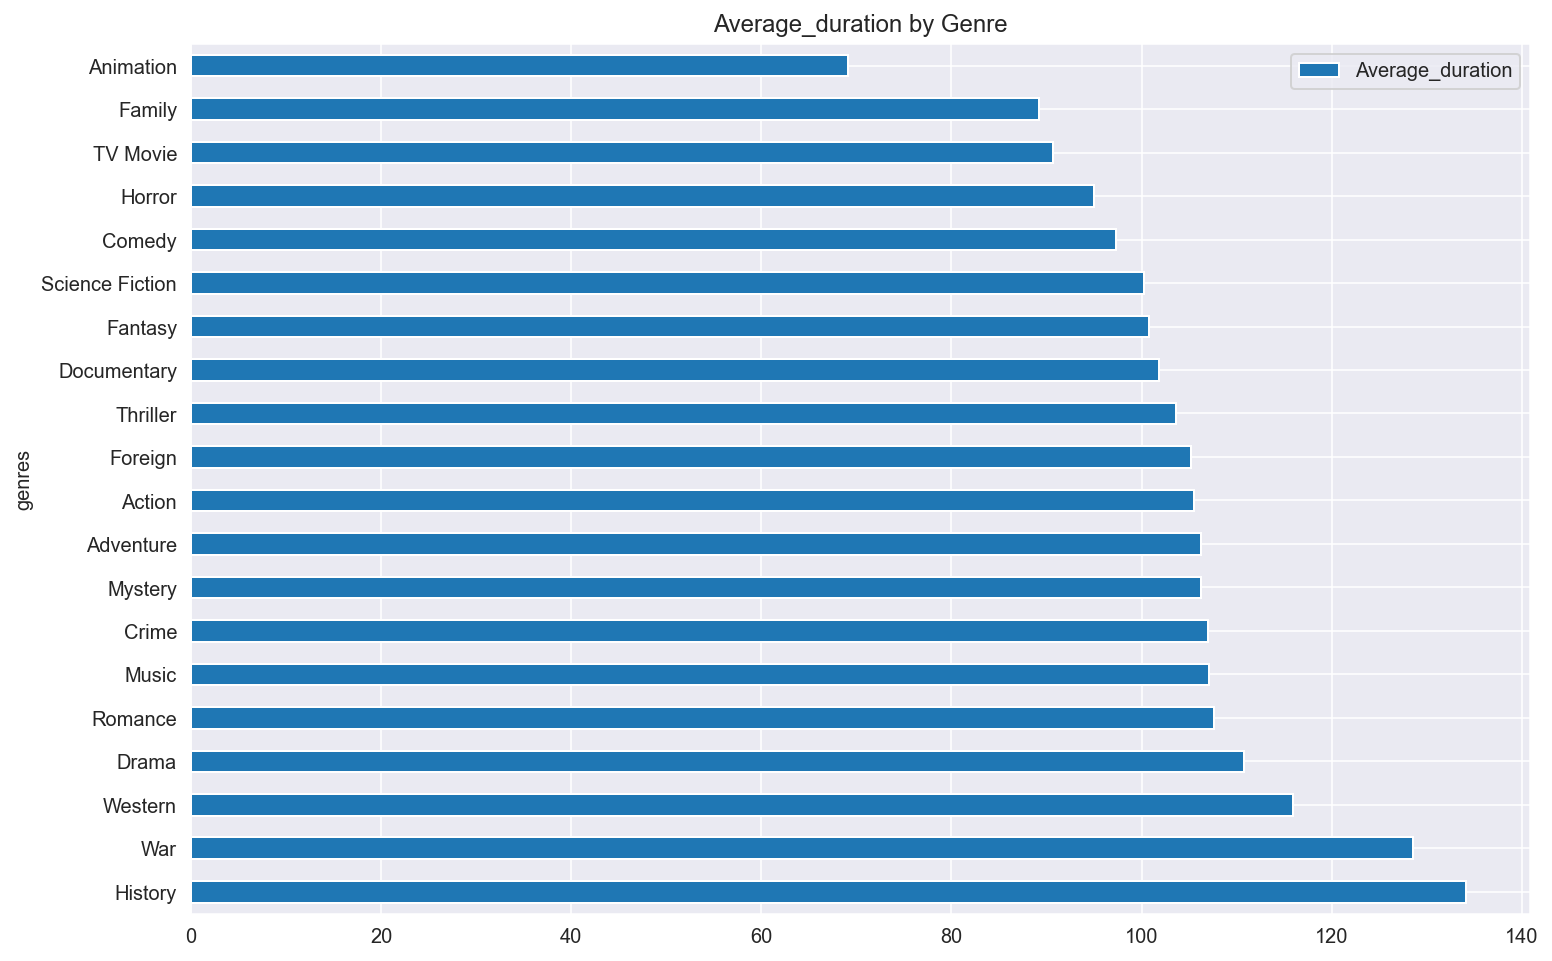

In [147]:
df1[['Average_duration']].plot.barh(stacked=True, title = 'Average_duration by Genre', figsize=(12, 8));

History genre type average duration is highest followed by War and Animation has least Average duration.

## What Properties associated with the highly profitable movies

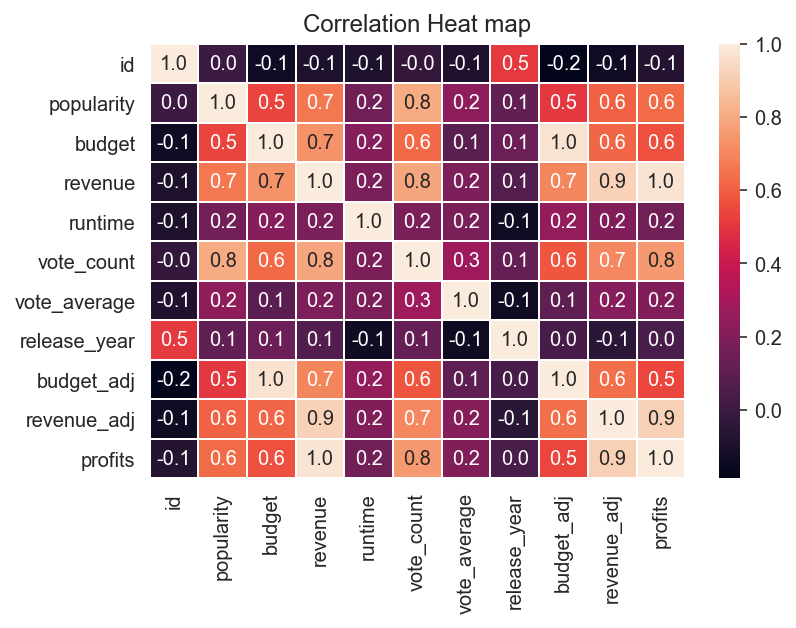

In [148]:
# heat map for dataset
sns.heatmap(movies_df.corr(), annot=True, linewidths=.5, fmt='.1f');
plt.title("Correlation Heat map");

In [149]:
# creating function for scatter plots
def scat(data):
    x = movies_df["revenue"]
    y = movies_df[data]
    plt.scatter(x, y)
    plt.title("revenue vs "+data)
    plt.xlabel("revenue")
    plt.ylabel(data)
    plt.show()

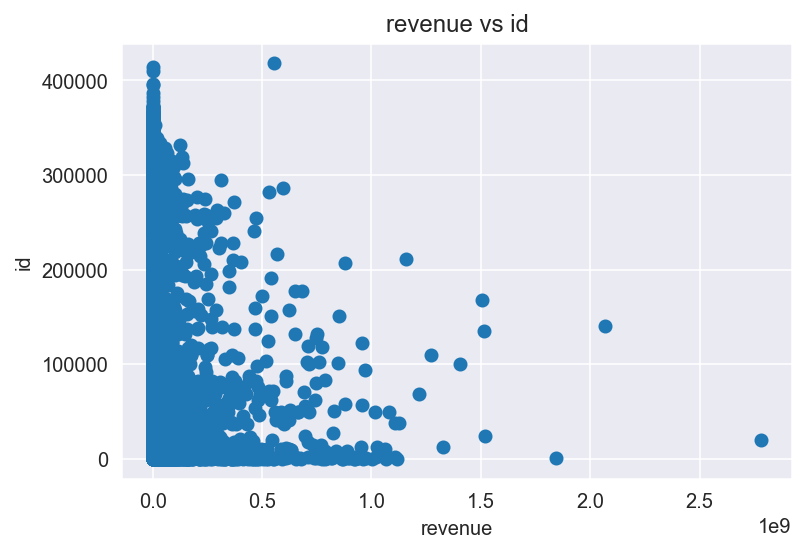

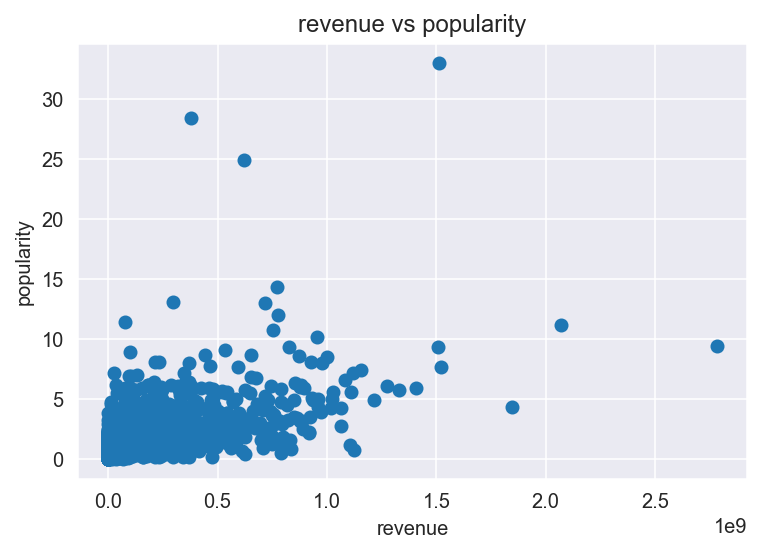

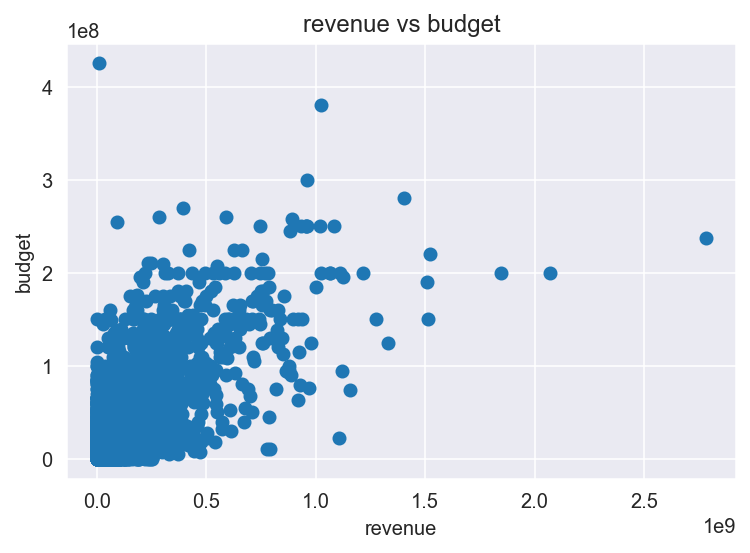

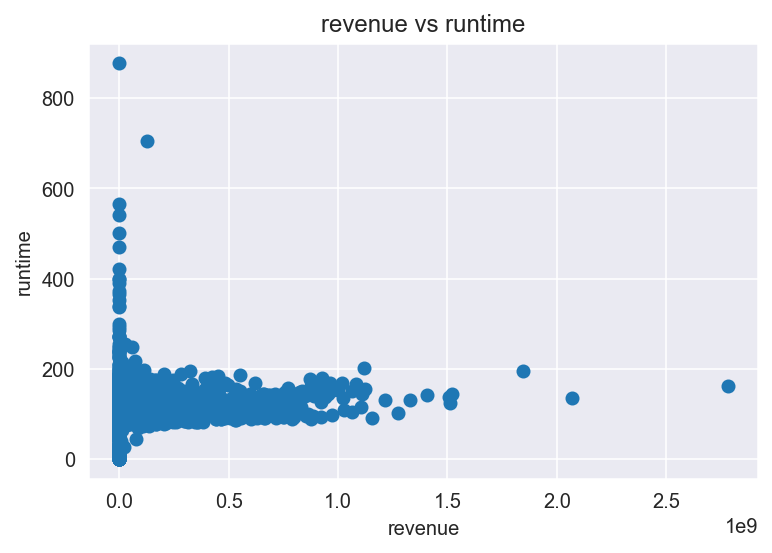

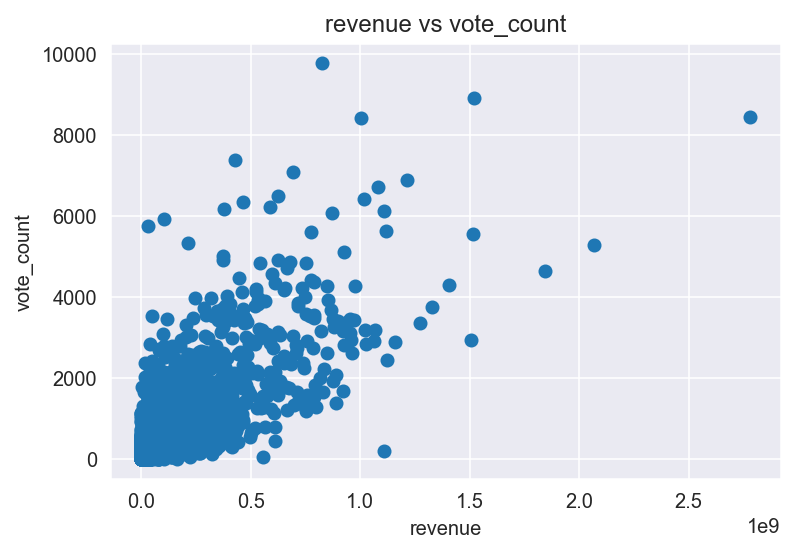

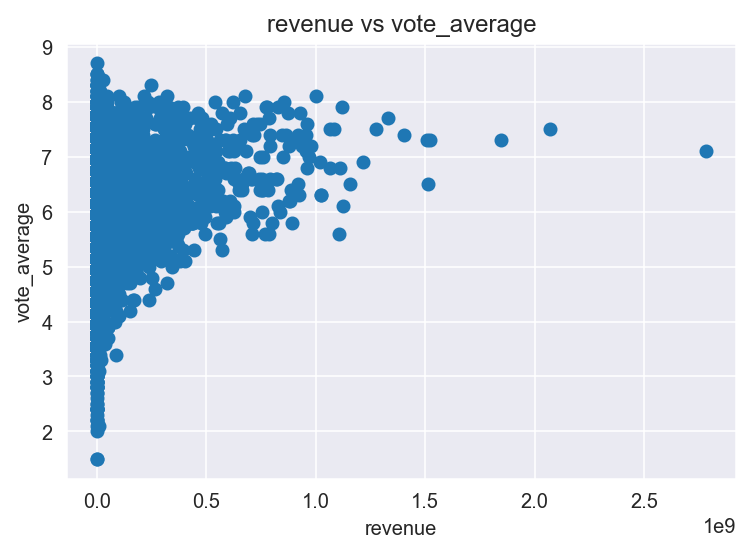

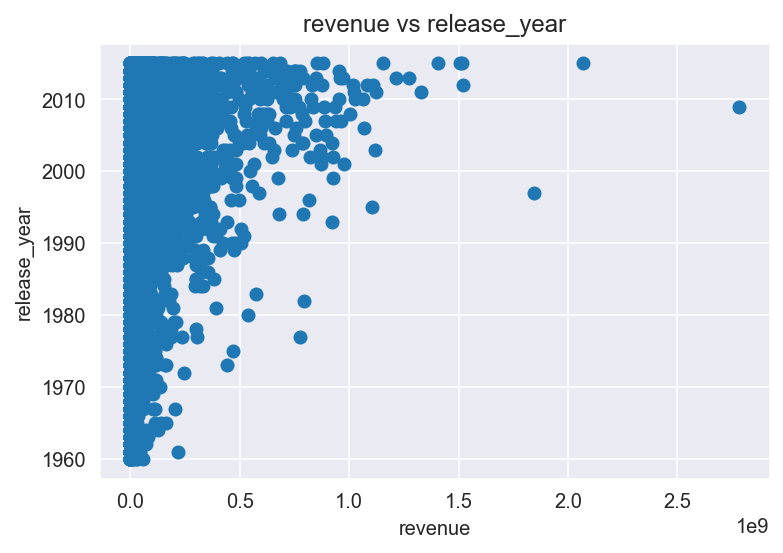

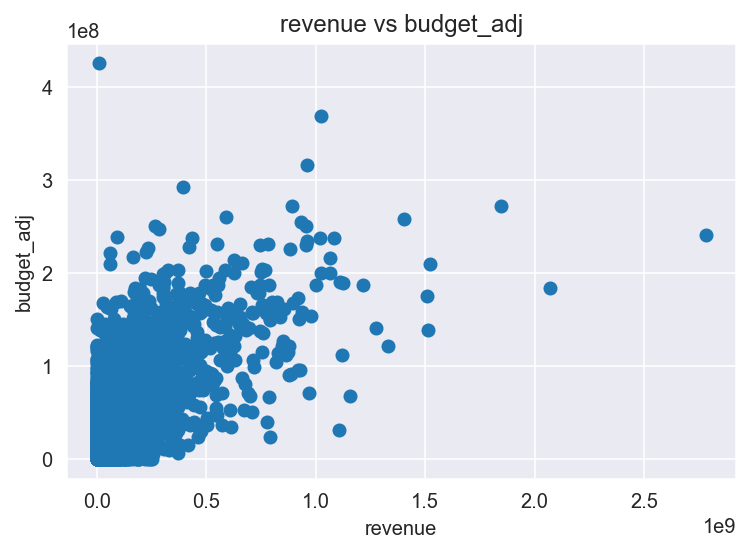

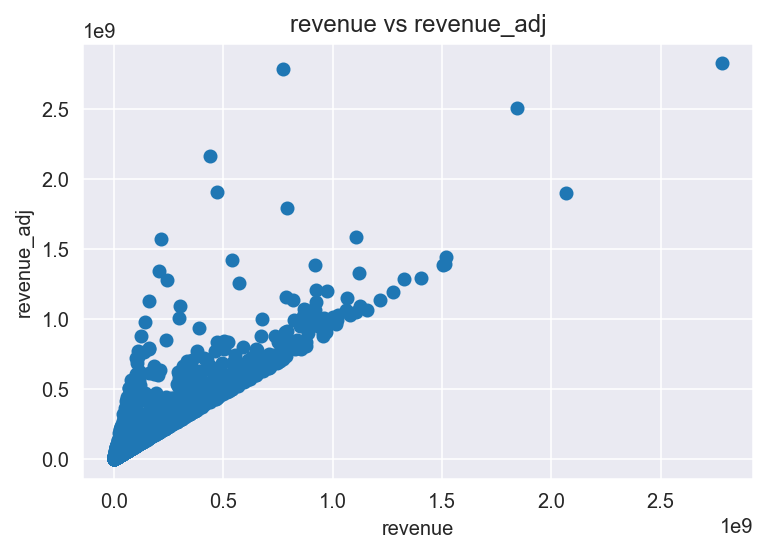

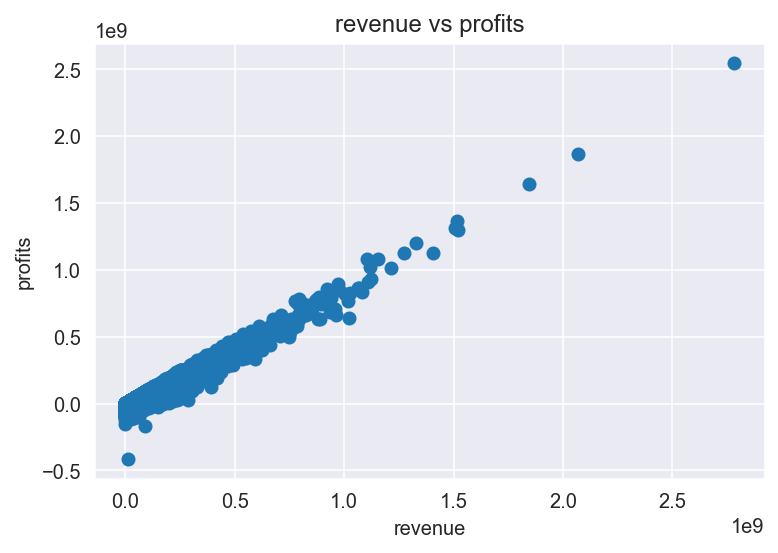

In [150]:
num_cols = ['int64','float64']
columns = movies_df.drop(columns=["revenue"]).select_dtypes(include=num_cols).columns
j = 1
for i in columns:
    scat(i)

Above, we have plotted the scatter plots between revenue vs remaining numeric columns. Budget , popularity, runtime, vote_count, profits have positive correlation with Revenue. As revenue is main variable reflects the profits. so these all variables are associated with the profitable movies.

## Conclusion

We are done with data Analysis on Tmdb-movies data and find out answers for questions we have posed:

    1) paromunt pictures produced maximum number of movies.
    2) "Avatar" receives maximum profits and " The Warriors Way" got least profits.
    3) Drama Genre is more popular over the period of time. Adventure and action genres receive 
       more popularity over the time.
    4) Adventure genre receives maximum profits and History genre type movies has maximum average duration.
    5) we have found the variables associated with the profits.

## Limitations 


1) Missing values present in the data set which we successfully removed.
2) There were duplicate rows present which were cleaned.
3) The budget and currency column do not have currency unit